# **A) Business Understanding**

On this planet earth that we are living, there are many beautiful creatures and plants around us in the natural world. Many of the plants are eye candy but some of them may be extremely dangerous or poisonous that may harm human’s life if they are accidentally touched or consumed. One of the most common plants in mother nature that is either edible or extremely harmful and also was widely consumed by many people is mushrooms. There are more than 50,000 species of mushrooms in the world, not all of them are edible and about 1% to 2% are poisonous, and some can be used for medical properties. Almost all of the mushrooms have their specific features that enable us to identify and classify them whether they are poisonous or not according to the research done by professionals. Indirectly, the fact is by using the features that the mushrooms have, we can identify and classify the mushrooms either they are poisonous or not, and also determine the correlation between those features affecting the results or not.

To proceed the classification of the mushrooms, our team had captured a set of mushrooms’ sample dataset which clearly stated all of their specific features and whether it is edible or poisonous. By using the sample dataset that we captured, we want and we are going to conduct a classification on the type of the mushrooms by taking every of their specific features to make a conclusion on whether it is edible or poisonous. By using the sample data set, we are able to classify the characteristics of the mushrooms and separate them in some analytical way. We are also able to do a test on every of the features on the mushrooms with the correlation to its poisonousness, so that this set of data not only brings us the information about the classification by what kind of mushrooms is poisonous, and also what is the features that will decide the types of the mushrooms.

The methods that we conduct the classification of mushrooms are by fitting and splitting the entire data into the training set and testing set, while the training set has the actual result to be compared by the predicted result produced by the testing set. And the data models are also being fit into several algorithms of the supervised learning like KNN classifier, SVM, Naive Bayes classification and etc, and among all of these models we will pick the most quality of the model which has the highest accuracy of classification. By using the supervised learning algorithms, there are some constraints in the sample data set which may cause problems when our work is progressing. For example the missing value of some of the columns and the null value, and to solve this problem, the solution is either we measure the importance meaning of the null value and still maintain it with giving the explanation or we confirmed that the missing value can be dropped because it doesn’t really affect the result that is to be obtained.

This project is not only an analysis of the mushrooms’ types but also to let us be able to identify and classify the edible mushrooms and poisonous mushrooms among all of them by comparing and observing the specific features on them with high accuracy but not overfitting results. In this way, perhaps that a successful classification model that we should obtain will have an accuracy that is more than 0.75, which means that the model can classify using the data given and obtain the results which are highly accurate. We also target higher recall scores which the score of actual poisonous mushrooms were predicted correctly. Recall score is more important than precision score, it is because if the model predicts poisonous mushrooms into edible class, this may cause human death.  We also target less training time for each model and consistency of each model. Higher training or fitting time may cause higher computational cost. Consistency and stablelity of the model is quite important, it is because the datasets we obtain each time maybe different. Chossen model must able to perfrom consistently each time regardless the dataset, training set and testing set.



# **B) Data Understanding**

Data understanding in the second step of the CRISP-DM process which required us  to acquire the data listed in the project resources. This initial collection includes data loading, if this is necessary for data understanding. We have implemented the matplotlib.pyplot from the python library to help us to visualize and understand the data from the mushrooms dataset that we obtain. We have plotted some bar chart and pie chart  to help us easier to visualize and understand.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix



mushrooms = pd.read_csv('/content/drive/Shared drives/Data Science /mushrooms.csv')#read csv file

labelencoder=LabelEncoder()


#mushrooms.head()
mushrooms.describe()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Amount of Edible and Poisonous Mushrooms From the dataset.

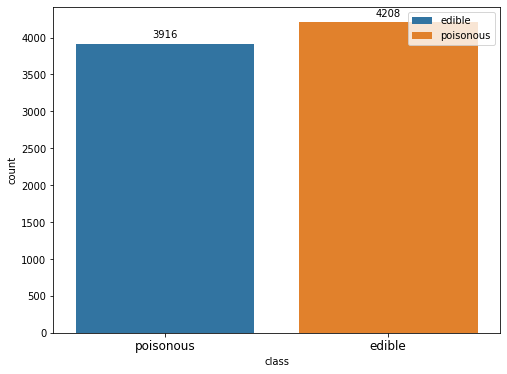

In [ ]:
# Visualising the number of mushrooms that fall in each class - p = poisonous, e=edible
plt.rcParams['figure.figsize']=8,6 
s = sns.countplot(x = "class",data = mushrooms)
for p in s.patches:
    s.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
class_legend   = plt.legend(s.patches, ['edible','poisonous'], loc="upper right", fontsize=10)
s.set_xticklabels(('poisonous', 'edible'),fontsize = 12)
plt.show()

From the figure above shown that the dataset has two classifications which are edible and poisonous. This dataset contains  4208 edible mushrooms and 3916 poisonous mushrooms. This bar chart shows that the dataset is quite balanced. There is no bias in this dataset.

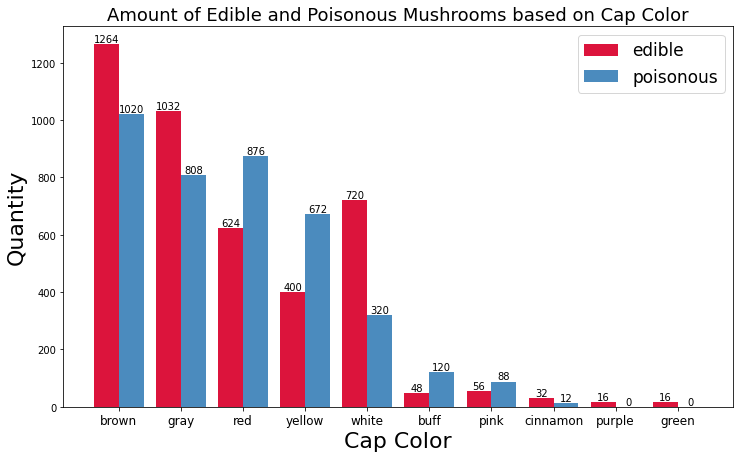

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [ ]:
cap_colors = mushrooms['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list
#Auto-labels the number of mushrooms for each bar color.
#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars

def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)


##############################################################################################################
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(mushrooms[mushrooms['cap-color'] == capColor].index)
    edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Cap Color',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_cc)
print(poisonous_cc)

## Amount of Edible and Poisonous Mushrooms based on Habitat

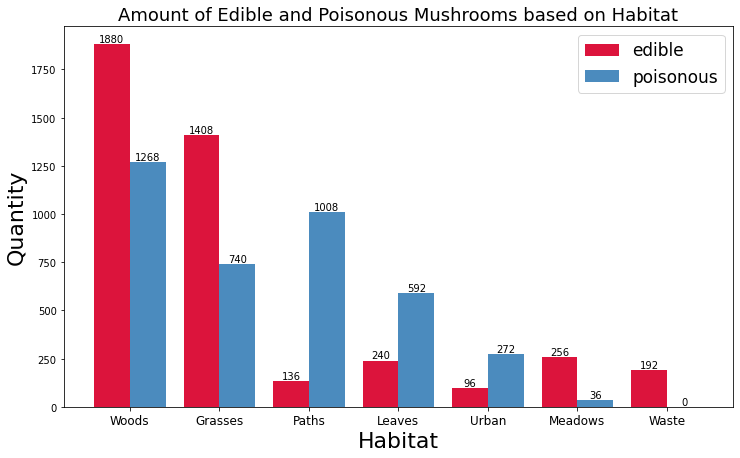

[1880, 1408, 136, 240, 96, 256, 192]
[1268, 740, 1008, 592, 272, 36, 0]


In [ ]:
#EDA habitat
habitat_colors = mushrooms['habitat'].value_counts()
m_height = habitat_colors.values.tolist() #Provides numerical values
habitat_colors.axes #Provides row labels
habitat_colors_labels = habitat_colors.axes[0].tolist() #Converts index object to list
#Auto-labels the number of mushrooms for each bar color.
#=====PLOT Preparations and Plotting====#
ind = np.arange(7)  # the x locations for the groups
width = 0.7        # the width of the bars
##############################################################################################################
poisonous_habitat = [] #Poisonous color cap list
edible_habitat = []    #Edible color cap list
for habitatColor in habitat_colors_labels:
    size = len(mushrooms[mushrooms['habitat'] == habitatColor].index)
    edibles = len(mushrooms[(mushrooms['habitat'] == habitatColor) & (mushrooms['class'] == 'e')].index)
    edible_habitat.append(edibles)
    poisonous_habitat.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_habitat , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_habitat , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Habitat",fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Habitat',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_habitat)
print(poisonous_habitat)

The bar chart above shows the amount of edible and poisonous mushrooms based on habitat. We can observe that all of the mushrooms from the waste habitat is edible. From the meadows habitat,  87.67 %  and 256 out 292 of the mushrooms are edible . For mushrooms from woods and grasses habitat also consists of many edible mushrooms which are 59.72% and 65.55% of the mushrooms from both habitats that just mentioned.  For mushrooms from paths, leaves and urbans habitats are likely poisonous compared to other habitats, which are 88.11%, 71.15% and 73.91% respectively for these three habitats.


## Amount of Edible and Poisonous Mushrooms based on Odor

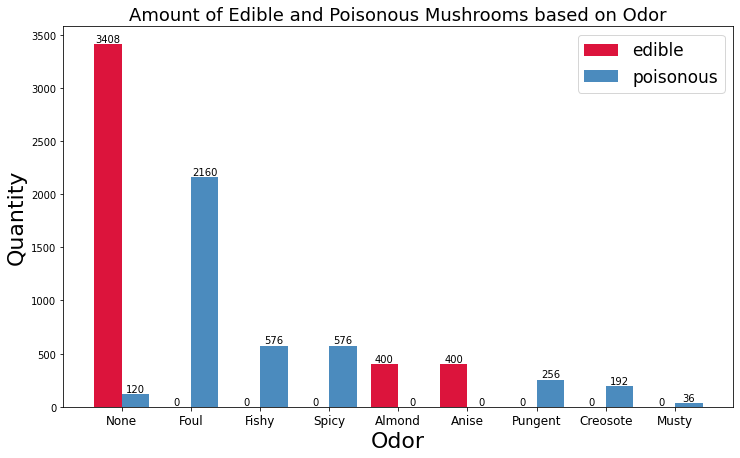

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [ ]:
#EDA odor
odor = mushrooms['odor'].value_counts()
m_height = odor.values.tolist() #Provides numerical values
odor.axes #Provides row labels
odor_labels = odor.axes[0].tolist() #Converts index object to list
#Auto-labels the number of mushrooms for each bar color.
#=====PLOT Preparations and Plotting====#
ind = np.arange(9)  # the x locations for the groups
width = 0.7        # the width of the bars
##############################################################################################################
poisonous_odor = [] #Poisonous color cap list
edible_odor = []    #Edible color cap list
for odorI in odor_labels:
    size = len(mushrooms[mushrooms['odor'] == odorI].index)
    edibles = len(mushrooms[(mushrooms['odor'] == odorI) & (mushrooms['class'] == 'e')].index)
    edible_odor.append(edibles)
    poisonous_odor.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_odor , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_odor , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Odor',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('None', 'Foul','Fishy','Spicy','Almond','Anise','Pungent','Creosote','Musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_odor)
print(poisonous_odor)

From the bart chart above shows the amount of edible and poisonous mushrooms based on odor. By observing the bar chart, we can conclude that mushrooms which are pungent, foul, fishy,spicy, creosote and musty odor are poisonous. For mushrooms which categorize as almond and anise are edible. For mushrooms which are odorless are most likely to be edible, approximately 96.65% is edible while only approximately 3.35% is poisonous.  


## Amount of Edible and Poisonous Mushrooms based on GIll Color


p


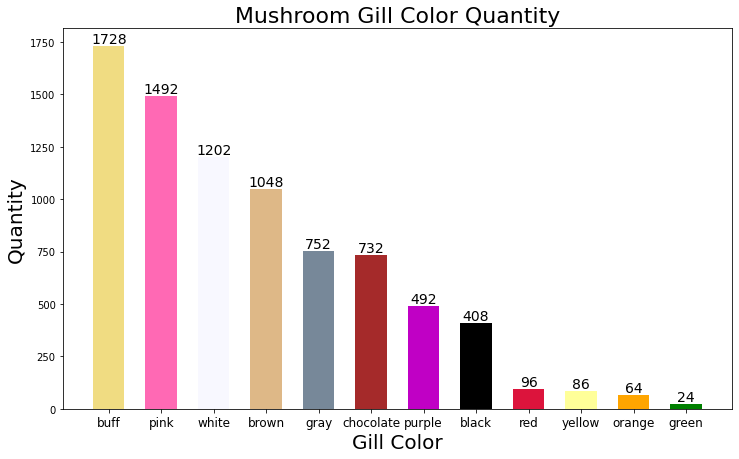

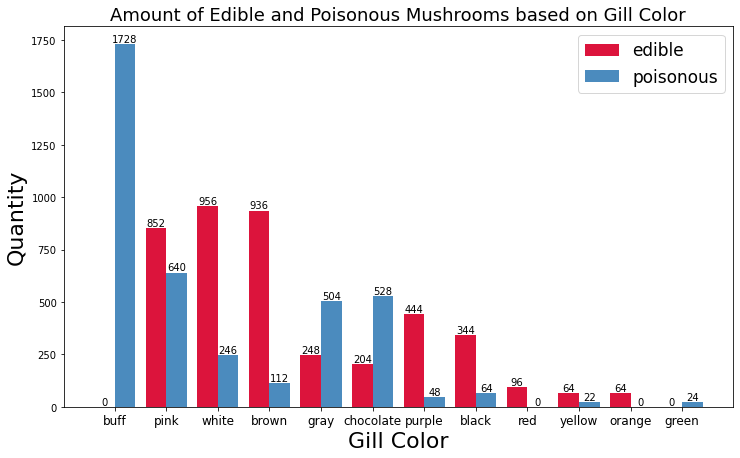

[0, 852, 956, 936, 248, 204, 444, 344, 96, 64, 64, 0]
[1728, 640, 246, 112, 504, 528, 48, 64, 0, 22, 0, 24]


In [ ]:
#Obtain total number of mushrooms for each 'gill-color' (Entire DataFrame)
gill_colors = mushrooms['gill-color'].value_counts()
m_height = gill_colors.values.tolist() #Provides numerical values
gill_colors.axes #Provides row labels
gill_color_labels = gill_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(12)  # the x locations for the groups
width = 0.6        # the width of the bars
colors = ['#F0DC82','#FF69B4','#f8f8ff','#DEB887','#778899','#A52A2A','#C000C5','k','#DC143C','#FFFF99','#FFA500','g']
#FFFFF0
fig, ax = plt.subplots(figsize=(12,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gill Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Gill Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('buff','pink','white','brown','gray','chocolate','purple','black','red','yellow','orange','green'),
                  fontsize = 12)
print(gill_colors.index[1])

autolabel(mushroom_bars)        
plt.show() #Display bars.

poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for gillColor in gill_color_labels:
    size = len(mushrooms[mushrooms['gill-color'] == gillColor].index)
    edibles = len(mushrooms[(mushrooms['gill-color'] == gillColor) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gill Color",fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Gill Color',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('buff','pink','white','brown','gray','chocolate','purple','black','red','yellow','orange','green'),
                  fontsize = 12)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_cc)
print(poisonous_cc)


From this bar chart we can see that the highest amount of the mushrooms among the gill colours is buff colour which has 1728 mushrooms and all are poisonous and non edible mushrooms. Besides that, green colour has the least amount of mushrooms among all the colours and its has all poisonous and non edible mushrooms.


## Amount of Edible and Poisonous Mushrooms based on Ring Type

['p', 'e', 'l', 'f', 'n']


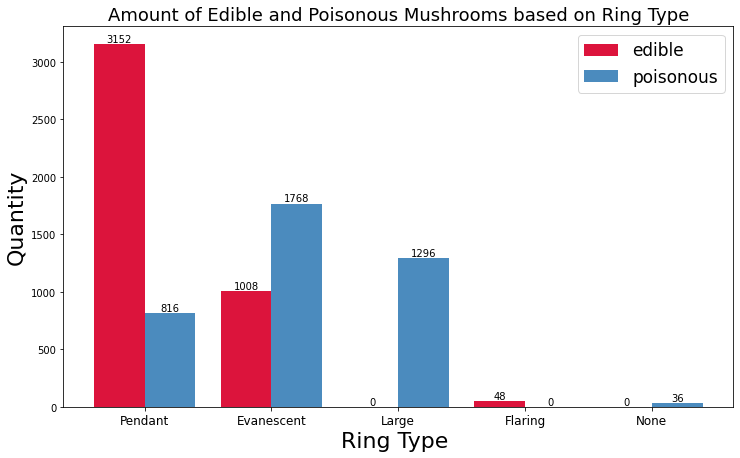

[3152, 1008, 0, 48, 0]
[816, 1768, 1296, 0, 36]


In [ ]:
#EDA ring type
ring_type = mushrooms['ring-type'].value_counts()
m_height = ring_type.values.tolist() #Provides numerical values
ring_type.axes #Provides row labels
ring_type_labels = ring_type.axes[0].tolist() #Converts index object to list
print(ring_type_labels)
#Auto-labels the number of mushrooms for each bar color.
#=====PLOT Preparations and Plotting====#
ind = np.arange(5)  # the x locations for the groups
width = 0.7        # the width of the bars
##############################################################################################################
poisonous_ring_type  = [] #Poisonous ring type list
edible_ring_type  = []    #Edible ring type list
for ringtype  in ring_type_labels:
    size = len(mushrooms[mushrooms['ring-type'] == ringtype ].index)
    edibles = len(mushrooms[(mushrooms['ring-type'] == ringtype ) & (mushrooms['class'] == 'e')].index)
    edible_ring_type .append(edibles)
    poisonous_ring_type .append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_ring_type , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_ring_type , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Ring Type ",fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Ring Type',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Pendant', 'Evanescent','Large','Flaring','None'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_ring_type )
print(poisonous_ring_type )

The bar chart above shows the amount of edible and poisonous mushrooms based on the ring types. By observing the bar chart, we can conclude 100% of the mushrooms with large and none ring type are poisonous. Mushrooms with flaring ring type are 100% edible.  Mushrooms that with pendant type are more likely to be edible compared to mushrooms with evanescent ring type. 3152 out of 3968 and 79.44% of mushrooms with pendant ring type are edible and 1768 out of 2776 and 63.69 of the mushrooms are poisonous. 

## Percentage of Edible and Poisonous Mushrooms Population based Population

[4040, 1712, 1248, 400, 384, 340]


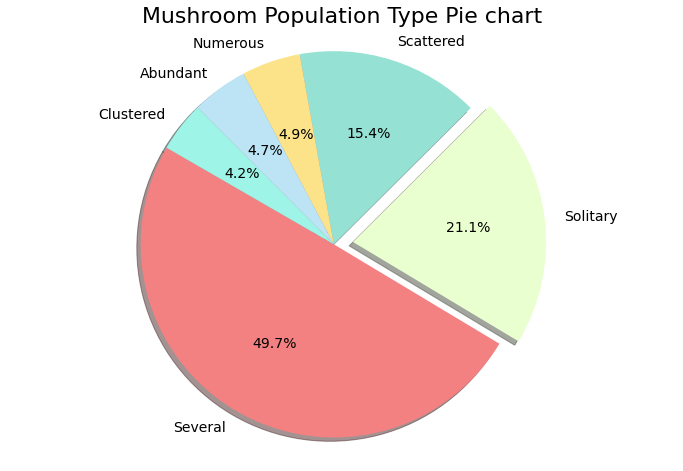

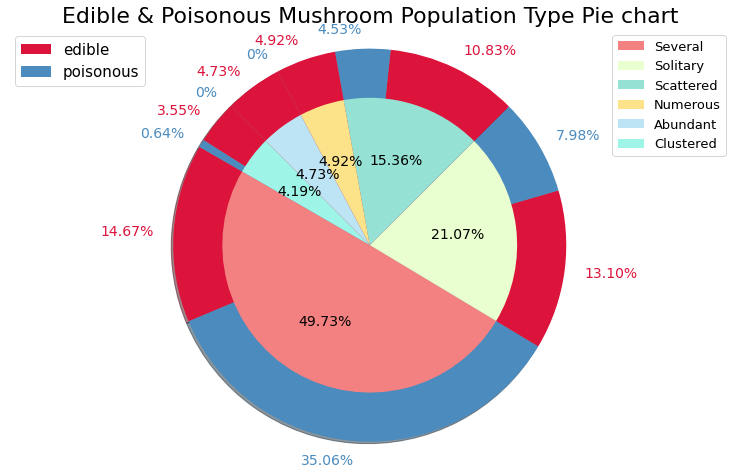

In [ ]:
#population
#Get the population types and its values for Single Pie chart
populations = mushrooms['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)
# Data to plot
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Pie chart', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

#DOUBLE PIE CHART
poisonous_pop = [] #Poisonous population type list
edible_pop = []    #Edible population type list
for pop in pop_types: 
    size = len(mushrooms[mushrooms['population'] == pop].index)
    edibles = len(mushrooms[(mushrooms['population'] == pop) & (mushrooms['class'] == 'e')].index)
    edible_pop.append(edibles) #Gets edibles
    poisonous_pop.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_pop)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])
#print(edible_pop) print(poisonous_pop) print(combine_ed_poi)

#Preparations for DOUBLE pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Population Type Pie chart', fontsize=22)
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
                  '3.55%','0.64%'] #Percetanges for edible and poisonous
#===First pie===
patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, labels= percentages_e_p,
                                colors=['#DC143C','#4b8bbe'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#DC143C') #Color % labels with red
    else:
        texts1[i].set_color('#4b8bbe') # " " blue
    texts1[i].set_fontsize(14)         #make labels bigger
#===Second pie===
patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

As the pie chart shown above, we are able to know that several type of mushrooms have the biggest part which contains 49.73% out of total mushrooms. The second largest will be solitary type of mushrooms which contain 21.07% and the third will be scattered type of mushrooms containing 15.36%. From the 49.73% we can know that, 14.67% is edible and 35.06% is poisonous in several type. Besides that, from 21.07% we can know that 7.98% is poisonous and 13.10% is edible in solitary type. Lastly, from 15.36% of scattered type, 4.53% is poisonous and 10.83% is edible.   

## Amount of Edible and Poisonous Mushrooms based on Gill Size

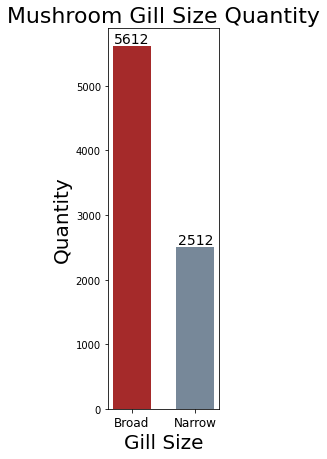

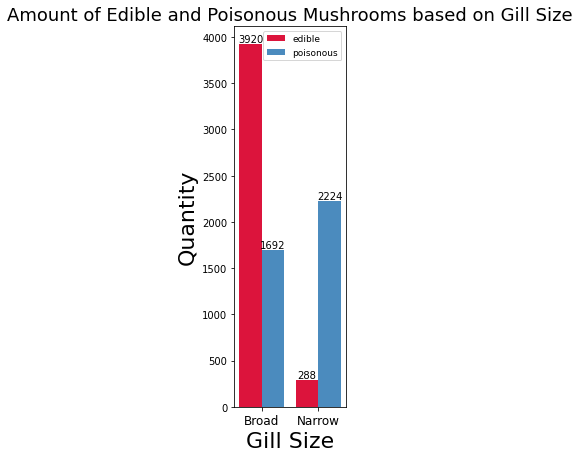

[3920, 288]
[1692, 2224]


In [ ]:
#gill size
#Obtain total number of mushrooms for each 'gill-size' (Entire DataFrame)
gill_size = mushrooms['gill-size'].value_counts()
m_height = gill_size.values.tolist() #Provides numerical values
gill_size.axes #Provides row labels
gill_size_labels = gill_size.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(2)  # the x locations for the groups
width = 0.6        # the width of the bars
colors = ['#A52A2A','#778899']
#FFFFF0
fig, ax = plt.subplots(figsize=(2,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gill Size",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Gill Size Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('Broad','Narrow'),
                  fontsize = 12)

autolabel(mushroom_bars)        
plt.show() #Display bars.

poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for gillSize in gill_size_labels:
    size = len(mushrooms[mushrooms['gill-size'] == gillSize].index)
    edibles = len(mushrooms[(mushrooms['gill-size'] == gillSize) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(2,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gill Size",fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Gill Size',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('Broad','Narrow'),
                  fontsize = 12)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=9)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_cc)
print(poisonous_cc)

From the bar chart shown above, we can know that broad gill size of mushrooms having 5612 number of mushrooms out of total and 2512 number of mushrooms is from narrow gill size. From the total number of broad gill size mushrooms, 69% is edible and 31% is poisonous. Besides, 11% is edible and 89% is poisonous from the total number of narrow gill size mushrooms.

## Amount of Edible and Poisonous Mushrooms based on Bruises

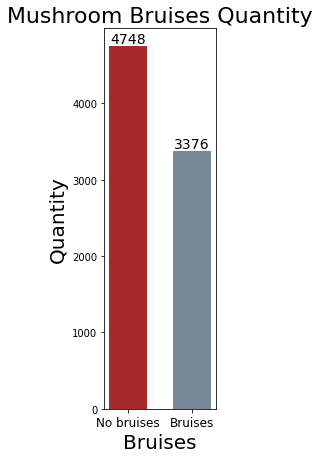

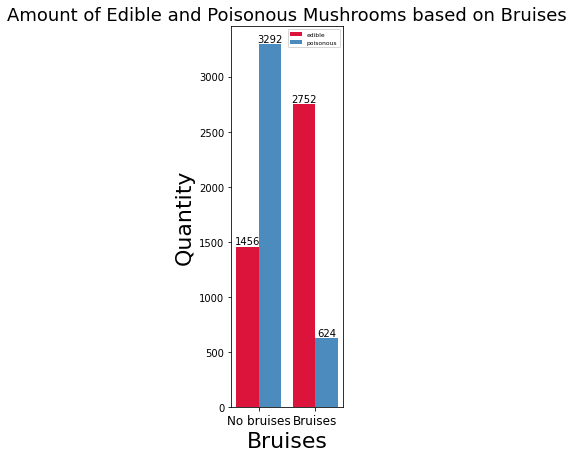

[1456, 2752]
[3292, 624]


In [ ]:
#bruises
#Obtain total number of mushrooms for each 'bruises' (Entire DataFrame)
bruises = mushrooms['bruises'].value_counts()
m_height = bruises.values.tolist() #Provides numerical values
bruises.axes #Provides row labels
bruises_labels = bruises.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(2)  # the x locations for the groups
width = 0.6        # the width of the bars
colors = ['#A52A2A','#778899']
#FFFFF0
fig, ax = plt.subplots(figsize=(2,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Bruises",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Bruises Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('No bruises','Bruises'),
                  fontsize = 12)
autolabel(mushroom_bars)        
plt.show() #Display bars.

poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for bruises in bruises_labels:
    size = len(mushrooms[mushrooms['bruises'] == bruises].index)
    edibles = len(mushrooms[(mushrooms['bruises'] == bruises) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(2,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel('Bruises',fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Bruises',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('No bruises','Bruises'),
                  fontsize = 12)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=6)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_cc)
print(poisonous_cc)
                        

From the bar chart shown above, we can know that no bruises of mushrooms having 4748 number of mushrooms out of total and 3376 number of mushrooms is from bruises. From the total number of no bruises mushrooms, 30% is edible and 70% is poisonous. Besides, 81% is edible and 19% is poisonous from the total number of bruises mushrooms.


## Amount of Edible and Poisonous Mushrooms based on Cap Shape

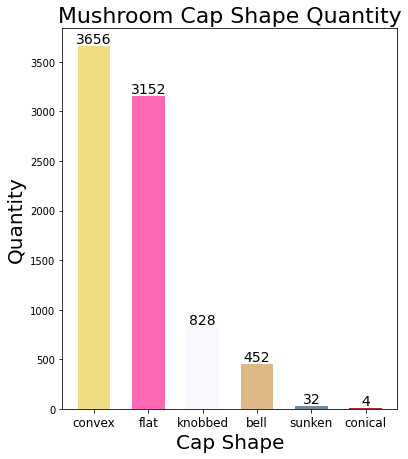

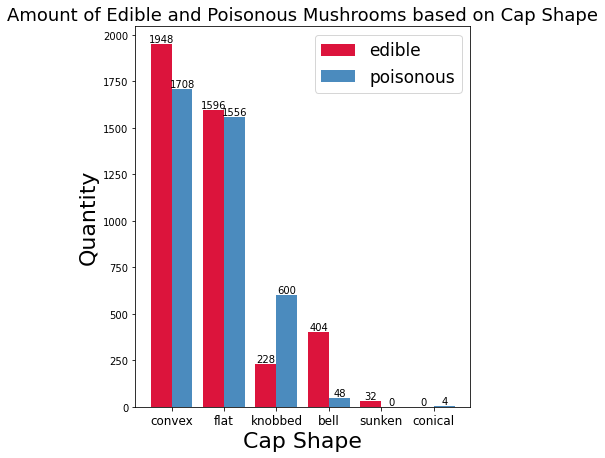

[1948, 1596, 228, 404, 32, 0]
[1708, 1556, 600, 48, 0, 4]


In [ ]:
#cap shape 
#Obtain total number of mushrooms for each 'cap-shape' (Entire DataFrame)
capshape = mushrooms['cap-shape'].value_counts()
m_height = capshape.values.tolist() #Provides numerical values
capshape.axes #Provides row labels
capshape_labels = capshape.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(6)  # the x locations for the groups
width = 0.6        # the width of the bars
colors = ['#F0DC82','#FF69B4','#f8f8ff','#DEB887','#778899','#A52A2A']
#FFFFF0
fig, ax = plt.subplots(figsize=(6,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Shape",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Shape Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('convex','flat','knobbed','bell','sunken','conical'),
                  fontsize = 12)
autolabel(mushroom_bars)        
plt.show() #Display bars.

poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capshape in capshape_labels:
    size = len(mushrooms[mushrooms['cap-shape'] == capshape].index)
    edibles = len(mushrooms[(mushrooms['cap-shape'] == capshape) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(6,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Shape",fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Cap Shape',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('convex','flat','knobbed','bell','sunken','conical'),
                  fontsize = 12)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_cc)
print(poisonous_cc)

From the bar chart shown above, we are able to know that convex having the highest amount of mushrooms among the other shape mushrooms which is 3656, 53% is edible mushrooms and 47% is poisonous mushrooms. The least amount of cap shape mushrooms is conical which is 4 mushrooms and 4 of them are poisonous.

## Amount of Edible and Poisonous Mushrooms based on Spore Print Color

['w', 'n', 'k', 'h', 'r', 'u', 'o', 'b', 'y']


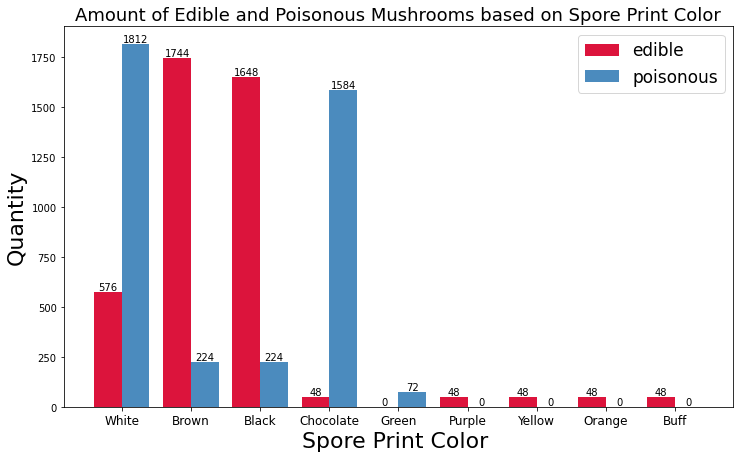

[576, 1744, 1648, 48, 0, 48, 48, 48, 48]
[1812, 224, 224, 1584, 72, 0, 0, 0, 0]


In [ ]:
#EDA Spore Ring Color
spore_print_color = mushrooms['spore-print-color'].value_counts()
m_height = spore_print_color.values.tolist() #Provides numerical values
spore_print_color.axes #Provides row labels
spore_print_color_labels = spore_print_color.axes[0].tolist() #Converts index object to list
print(spore_print_color_labels)
#Auto-labels the number of mushrooms for each bar color.
#=====PLOT Preparations and Plotting====#
ind = np.arange(9)  # the x locations for the groups
width = 0.7        # the width of the bars
##############################################################################################################
poisonous_spore_print_color  = [] #Poisonous ring type list
edible_spore_print_color  = []    #Edible ring type list
for sporeprintcolor  in spore_print_color_labels:
    size = len(mushrooms[mushrooms['spore-print-color'] == sporeprintcolor ].index)
    edibles = len(mushrooms[(mushrooms['spore-print-color'] == sporeprintcolor ) & (mushrooms['class'] == 'e')].index)
    edible_spore_print_color .append(edibles)
    poisonous_spore_print_color .append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_spore_print_color , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_spore_print_color , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Spore Print Color ",fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Spore Print Color',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('White', 'Brown','Black','Chocolate','Green','Purple','Yellow','Orange','Buff'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_spore_print_color)
print(poisonous_spore_print_color)

The bar chart above shows the amount of edible and poisonous mushrooms based on the ring types. By observing the bar chart, we can conclude that mushrooms with purple, yellow, orange and buff spore print color are 100% edible while mushrooms with green spore print color are 100%  poisonous. For mushrooms which are chocolate and white spore print color are more likely poisonous which are 97.06% and 75.88%. While mushrooms which are brown and black spore print color are more likely edible which are 88.62% and 88.03% for both colors.

## Amount of Edible and Poisonous Mushrooms based on Gill Spacing

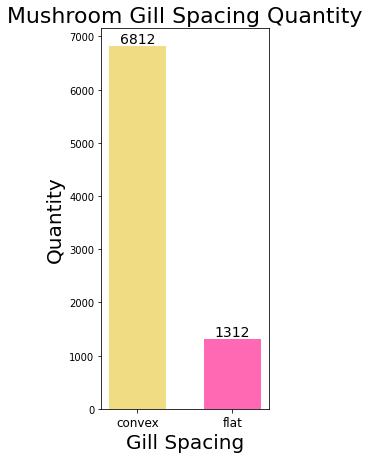

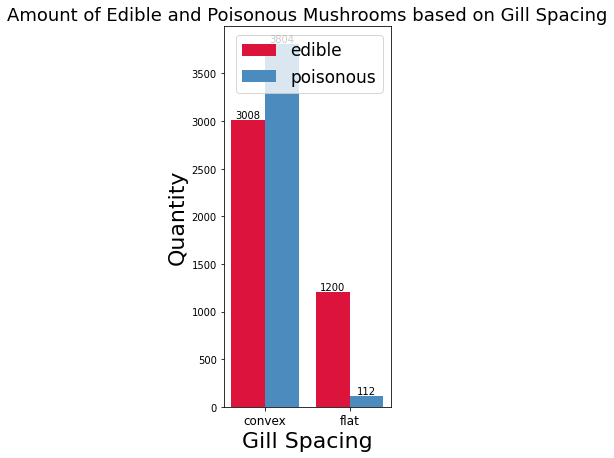

[3008, 1200]
[3804, 112]


In [ ]:
#--------------------------------------------------------------------------------
#gill spacing
#Obtain total number of mushrooms for each 'gill-spacing' (Entire DataFrame)
gillspacing = mushrooms['gill-spacing'].value_counts()
m_height = gillspacing.values.tolist() #Provides numerical values
gillspacing.axes #Provides row labels
gillspacing_labels = gillspacing.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(2)  # the x locations for the groups
width = 0.6        # the width of the bars
colors = ['#F0DC82','#FF69B4','#f8f8ff']
#FFFFF0
fig, ax = plt.subplots(figsize=(3,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gill Spacing",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Gill Spacing Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('convex','flat','knobbed'),
                  fontsize = 12)
autolabel(mushroom_bars)        
plt.show() #Display bars.

poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for gillspacing in gillspacing_labels:
    size = len(mushrooms[mushrooms['gill-spacing'] == gillspacing].index)
    edibles = len(mushrooms[(mushrooms['gill-spacing'] == gillspacing) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#=====PLOT Preparations and Plotting====#
width = 0.40
fig, ax = plt.subplots(figsize=(3,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#DC143C')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#4b8bbe')

#Add some text for labels, title and axes ticks
ax.set_xlabel("Gill Spacing",fontsize=22)
ax.set_ylabel('Quantity',fontsize=22)
ax.set_title('Amount of Edible and Poisonous Mushrooms based on Gill Spacing',fontsize=18)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('convex','flat','knobbed'),
                  fontsize = 12)

ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars,10)
autolabel(poison_bars,10)
plt.show()
print(edible_cc)
print(poisonous_cc)

The bar chart above shows the amount of edible and poisonous mushrooms based on the ring types. By observing the bar chart, we can conclude that crowded mushrooms are more likely edible compared to mushrooms with close gill spacing. 91.46 of crowded mushrooms are edible while 55.84% of close gill spacing mushrooms are poisonous.

# **C) Data Preparation**

Data preparation and feature selection is one of the most important processes to be carried out before we start our analysis or modelling. There are various steps in data preparation such as data cleaning and feature selection. Such as remove attributes with a lot of missing data


## Data Quality Report

In [ ]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


The picture above shows the total count, unique value, highest frequency value and its frequency in each column. By observing the picture above, we can know that there are a total of 8124 rows for the dataset. From the above we can observe that this mushroom’s dataset one of the attributes which is veil type only consist of only one unique value. This attribute has no meaning in training the dataset for prediction since it only has one unique value which all rows have the same value. We decided to drop this attribute for training and modelling. 


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

mushrooms1 = mushrooms
mushrooms1 = mushrooms1.replace(to_replace ='?', value =np.NaN) 

pd.set_option('display.width', 110)

print(mushrooms1.describe())
#print(dataset.head(20))
#print sum of nunll
print('Column\t\t\tSum of null value\n-----------------------------------------')
print(mushrooms1.isnull().sum())
print(mushrooms1.info())

print('s' in mushrooms1.values)

column_list = mushrooms1.columns.values.tolist()

#percentage of each value
print(mushrooms1['stalk-root'].value_counts(normalize=True))

#print(dataset.info())
# Categories in each feature x

#print(column_list)
for column_name in column_list:
    print(column_name)
    print(mushrooms1[column_name].unique())


       class cap-shape cap-surface  ... spore-print-color population habitat
count   8124      8124        8124  ...              8124       8124    8124
unique     2         6           4  ...                 9          6       7
top        e         x           y  ...                 w          v       d
freq    4208      3656        3244  ...              2388       4040    3148

[4 rows x 23 columns]
Column			Sum of null value
-----------------------------------------
class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring      

Based on the data quality verification, we can see that there is quite a large volume for null value in the stalk-root column. We decided to drop the stalk-root column due to its large quantity of missing value. The large quantity of null value will cause the bias in estimation on the parameters. Besides, there are 22 variables able to use to classify and predict for the mushroom type.

## Feature Importance

Feature selection is also an  important step in the Data Preparation process here as still after the removal of "veil-type". We found a way to remove some of the insignificant and unimportant variables, and we will do it using Chi-Squared Feature Selection, but before that we need to convert all the input variables into nominal format using label encoder since all of our attributes is in nominal data. Odinal encoder is not suitable for this case. First, we had split the dataset into train and test before we do the actual feature selection. 


Feature cap-shape: 15.511622
Feature cap-surface: 151.789570
Feature cap-color: 11.432411
Feature bruises: 952.386594
Feature odor: 44.775734
Feature gill-attachment: 3.135560
Feature gill-spacing: 660.370873
Feature gill-size: 1347.308598
Feature gill-color: 4675.760675
Feature stalk-shape: 25.361532
Feature stalk-surface-above-ring: 176.066402
Feature stalk-surface-below-ring: 159.868167
Feature stalk-color-above-ring: 85.775078
Feature stalk-color-below-ring: 82.904501
Feature veil-color: 4.318830
Feature ring-number: 21.383513
Feature ring-type: 1590.284543
Feature spore-print-color: 312.906977
Feature population: 250.261548
Feature habitat: 613.695572


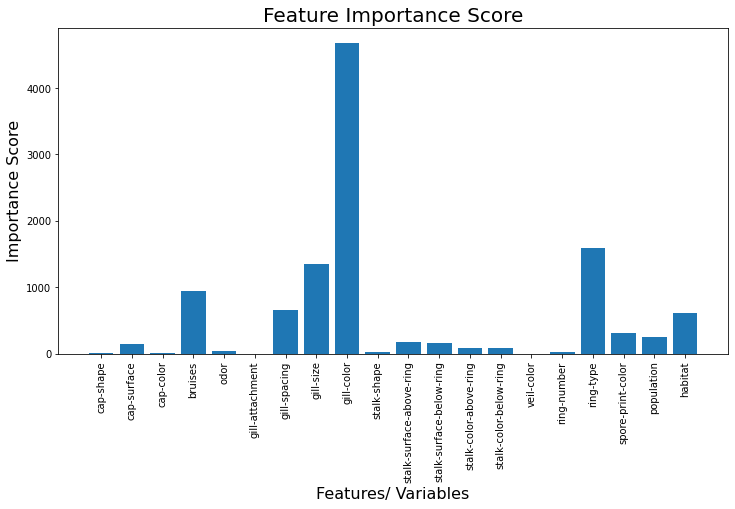

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing',
       'gill-size', 'gill-color', 'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
labelencoder=LabelEncoder()
for column in mushrooms.columns:
    mushrooms[column] = labelencoder.fit_transform(mushrooms[column])

# Creating independent and dependent variables
x = mushrooms.drop(columns=["class","veil-type","stalk-root"], axis = 1)
y = mushrooms["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

def select_features(x_train, y_train, x_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(x_train, y_train)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    return x_train_fs, x_test_fs, fs

x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (x.columns[i], fs.scores_[i]))
# plot the scores

plt.figure(figsize = (12,6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Feature Importance Score", size = 20)
plt.xlabel("Features/ Variables", size = 16, color = "black")
plt.ylabel("Importance Score", size = 16, color = "black")
plt.xticks(range(len(x.columns)), x.columns,rotation=90)
plt.show()

print(x_train.columns)

Before we perform feature selection, we encode all the column by using label enconder. From the bar chart shown above, we can observe the importance score of each feature from the dataset. Hence, we decided to pick those features which have more than 100 importance scores. We have selected ‘cap-surface’, ‘bruises’, ‘gill-spacing’, ‘gill-size’, ‘gill-color’, ‘stalk-surface-above ring’, ‘stalk-surface-below ring’, ‘ring-type’, ‘spore-print-color’, ‘population’ and habitat. 

## Drop Attributes

In [ ]:
#drop attributes
x_new = x.drop(columns = ["cap-surface", "cap-color", "odor", "gill-attachment", "stalk-shape",
                         "stalk-color-above-ring", "stalk-color-below-ring", "veil-color", "ring-number"])

# **D) Modelling**

## Logistic Regression

Training time: 0.10998201370239258s
[[823  29]
 [ 69 704]]
Accuracy score: 0.940
Precision score: 0.960
Recall score: 0.911
F1 score: 0.935
Training Accuracy:  0.934605323895984
Testing Accuracy:  0.9396923076923077


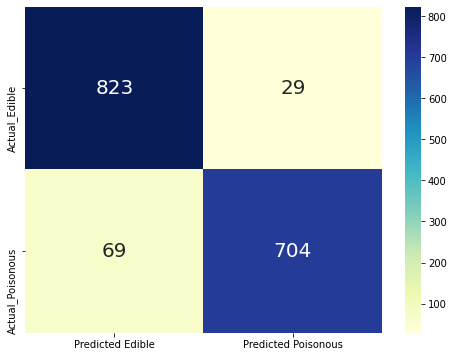

In [ ]:
from sklearn.model_selection import train_test_split
x_newtrain, x_newtest, y_newtrain, y_newtest = train_test_split(x_new, y, test_size = 0.2, random_state=0)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time


acscore = []
acprecision = []
acrecall = []
acF1 = []
acTrainingTime = []

from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression()
start = time.time()
LRclassifier.fit(x_newtrain, y_newtrain)
stop = time.time()
trainingTime = stop - start
print(f"Training time: {trainingTime}s")

# Predicting the test set
y_pred = LRclassifier.predict(x_newtest)

# Making the confusion matrix and calculating accuracy score
cm = confusion_matrix(y_newtest, y_pred)
ac = accuracy_score(y_newtest, y_pred)
precision = precision_score(y_newtest, y_pred)
recall = recall_score(y_newtest, y_pred)
f1 = f1_score(y_newtest, y_pred)

acscore.append(ac)
acprecision.append(precision)
acrecall.append(recall)
acF1.append(f1)
acTrainingTime.append(trainingTime)

sns.heatmap(cm, xticklabels=['Predicted Edible', 'Predicted Poisonous'], yticklabels=['Actual_Edible', 'Actual_Poisonous'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print(cm)
print('Accuracy score: {0:0.3f}'.format(ac))
print('Precision score: {0:0.3f}'.format(precision))
print('Recall score: {0:0.3f}'.format(recall))
print('F1 score: {0:0.3f}'.format(f1))
print('Training Accuracy: ',LRclassifier.score(x_newtrain, y_newtrain))
print('Testing Accuracy: ',LRclassifier.score(x_newtest, y_newtest))

The above image shows the accuracy and the confusion matrix of prediction by using Logistic Regression. By observing the image above, we can know that the accuracy for this algorithm is just 0.94 which is relatively high. For the recall score of this method is  0.911, the recall score is the accuracy of actual poisonous that predicted correctly. 704 out of 773 were predicted correctly based on the actual poisonous mushroom.Unfortunately, other 69 mushrooms were predicted edible but actually those mushrooms are poisonous. The recall score is quite high but still 69 mushrooms were predicted wrong which is the false negative value. Precision score of this model is quite high but is not our main objective. The F1 score for the Logistic Regression is 0.935. The F1 Score is the weighted average of Precision and Recall. Although 0.935 in F1 score is counted as high value, but the F1 value should be expected as high as possible.


## Gaussian Naive Bayes

Training time: 0.00618743896484375s
Accuracy score: 0.916
Precision score: 0.945
Recall score: 0.875
F1 score: 0.909
Training Accuracy:  0.9181412525003847
Testing Accuracy:  0.9163076923076923


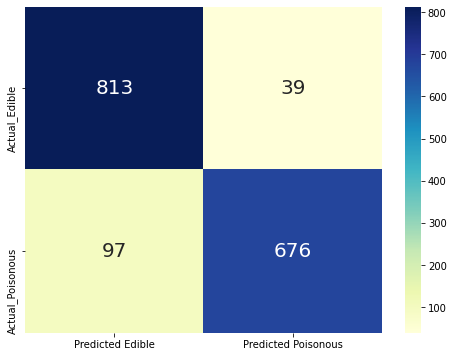

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNBclassifier = GaussianNB()
start = time.time()
GNBclassifier.fit(x_newtrain, y_newtrain)
stop = time.time()
trainingTime = stop - start
print(f"Training time: {trainingTime}s")
y_pred = GNBclassifier.predict(x_newtest)
cm = confusion_matrix(y_newtest, y_pred)
ac = accuracy_score(y_newtest, y_pred)
precision = precision_score(y_newtest, y_pred)
recall = recall_score(y_newtest, y_pred)
f1 = f1_score(y_newtest, y_pred)

acscore.append(ac)
acprecision.append(precision)
acrecall.append(recall)
acF1.append(f1)
acTrainingTime.append(trainingTime)

sns.heatmap(cm, xticklabels=['Predicted Edible', 'Predicted Poisonous'], yticklabels=['Actual_Edible', 'Actual_Poisonous'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print('Accuracy score: {0:0.3f}'.format(ac))
print('Precision score: {0:0.3f}'.format(precision))
print('Recall score: {0:0.3f}'.format(recall))
print('F1 score: {0:0.3f}'.format(f1))
print('Training Accuracy: ',GNBclassifier.score(x_newtrain, y_newtrain))
print('Testing Accuracy: ',GNBclassifier.score(x_newtest, y_newtest))

By applying Gaussian Naive Bayes algorithm. We can see that the accuracy of the Gaussian Naive Bayes is 0.92. The precision score is also 0.945 which is relatively high value. The number of false positive values by using Gaussian is 39 out of 715 while for false negative is 97 out of 910. The recall score for the method is 0.875. Although Gaussian Naive Bayes are able to give the high value of prediction, however the recall score is only 0.875 which is not high enough. It is not a good phenomenon. This is because treating the poisonous mushroom as the edible mushroom will cause serious issues to the people. The F1 score for this algorithm is only 0.909. This is because the recall score for Gaussian Naive Bayes is only 0.875. The F1 score will be affected by the precision and recall score.

## SVC model

Training time: 0.45055651664733887s
[[843   9]
 [ 25 748]]
Accuracy score: 0.979
Precision score: 0.988
Recall score: 0.968
F1 score: 0.978
Training Accuracy:  0.9796891829512233
Testing Accuracy:  0.9790769230769231


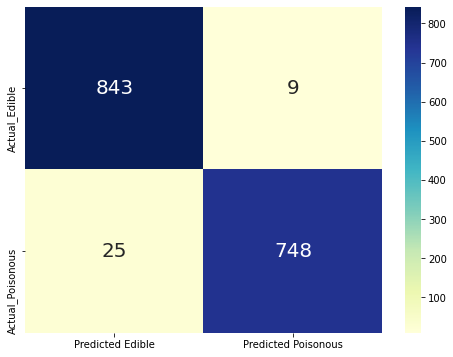

In [ ]:
from sklearn.svm import SVC
svcclassifier = SVC(random_state=0)
start = time.time()
svcclassifier.fit(x_newtrain, y_newtrain)
stop = time.time()
trainingTime = stop - start
print(f"Training time: {trainingTime}s")

# predicting test set
y_pred = svcclassifier.predict(x_newtest)

cm = confusion_matrix(y_newtest, y_pred)
ac = accuracy_score(y_newtest, y_pred)
precision = precision_score(y_newtest, y_pred)
recall = recall_score(y_newtest, y_pred)
f1 = f1_score(y_newtest, y_pred)

acscore.append(ac)
acprecision.append(precision)
acrecall.append(recall)
acF1.append(f1)
acTrainingTime.append(trainingTime)

sns.heatmap(cm, xticklabels=['Predicted Edible', 'Predicted Poisonous'], yticklabels=['Actual_Edible', 'Actual_Poisonous'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print(cm)
print('Accuracy score: {0:0.3f}'.format(ac))
print('Precision score: {0:0.3f}'.format(precision))
print('Recall score: {0:0.3f}'.format(recall))
print('F1 score: {0:0.3f}'.format(f1))
print('Training Accuracy: ',svcclassifier.score(x_newtrain, y_newtrain))
print('Testing Accuracy: ',svcclassifier.score(x_newtest, y_newtest))

By applying the SVM algorithm. We can see that the accuracy of the SVM is 0.979. The precision score is also 0.988 which is relatively high value. The number of false negative value by using SVM is 25 out of 773 while for false positives is 9 out of 852. The recall score for the method is 0.968. However SVM are able to give the high value of prediction,but the false negative value is still considered low. Hence, it is quite a good scenario.By having a high recall score, we are able to avoid and minimize the mistake predicted wrongly and treat the poisonous mushroom as the edible mushroom,which will cause death to the people. For the F1 score of SVM algorithm is 0.978. It is because the recall score and the precision score for the SVM is also relatively high.

## KNN Classifier

Training time: 0.01524496078491211s
[[851   1]
 [  0 773]]
Accuracy score: 0.999
Precision score: 0.999
Recall score: 1.000
F1 score: 0.999
Training Accuracy:  0.9998461301738729
Testing Accuracy:  0.9993846153846154


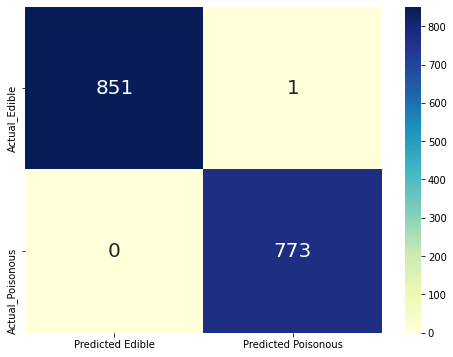

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier()
start = time.time()
KNNclassifier.fit(x_newtrain, y_newtrain)
stop = time.time()
trainingTime = stop - start
print(f"Training time: {trainingTime}s")

y_pred = KNNclassifier.predict(x_newtest)
cm = confusion_matrix(y_newtest, y_pred)
ac = accuracy_score(y_newtest, y_pred)
precision = precision_score(y_newtest, y_pred)
recall = recall_score(y_newtest, y_pred)
f1 = f1_score(y_newtest, y_pred)

acscore.append(ac)
acprecision.append(precision)
acrecall.append(recall)
acF1.append(f1)
acTrainingTime.append(trainingTime)

sns.heatmap(cm, xticklabels=['Predicted Edible', 'Predicted Poisonous'], yticklabels=['Actual_Edible', 'Actual_Poisonous'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print(cm)
print('Accuracy score: {0:0.3f}'.format(ac))
print('Precision score: {0:0.3f}'.format(precision))
print('Recall score: {0:0.3f}'.format(recall))
print('F1 score: {0:0.3f}'.format(f1))
print('Training Accuracy: ',KNNclassifier.score(x_newtrain, y_newtrain))
print('Testing Accuracy: ',KNNclassifier.score(x_newtest, y_newtest))

By applying the KNN classifier algorithm. We can see that the accuracy of the KNN classifier is 0.999. The precision score is also 0.999 which is the almost the perfect value. The number of both false positives and false negative values by using KNN classifier are 1 and 0. Which mean that only 1 actual edible mushroom is predicted as poisonous and will not cause any human death.  The recall score for the method is 1, so that we will not classify wrongly for example if a mushroom is actually poisonous, the classification result will poisonous. The both recall score and precision score are quite high, therefore the F1 score for KNN classifier is also 0.999. Although the traning accuracy for this algorithm is 0.999 but it not counted as over fitting. This is because the testing accuracy for this algorithm is also 0.999. As we can see the KNN classifier brings us a good prediction value that means by using this algorithm, we can predict the class of the mushrooms accurately and avoid the misprediction of the class.

## Decision Tree

Training time: 0.006131172180175781s
[[852   0]
 [  0 773]]
Accuracy score: 1.000
Precision score: 1.000
Recall score: 1.000
F1 score: 1.000
Training Accuracy:  1.0
Testing Accuracy:  1.0


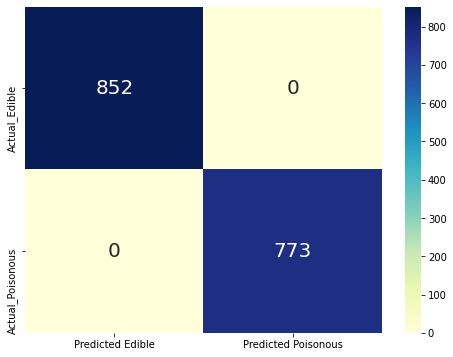

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(random_state=0)
start = time.time()
DTclassifier.fit(x_newtrain, y_newtrain)
stop = time.time()
trainingTime = stop - start
print(f"Training time: {trainingTime}s")

y_pred = DTclassifier.predict(x_newtest)
cm = confusion_matrix(y_newtest, y_pred)
ac = accuracy_score(y_newtest, y_pred)
precision = precision_score(y_newtest, y_pred)
recall = recall_score(y_newtest, y_pred)
f1 = f1_score(y_newtest, y_pred)

acscore.append(ac)
acprecision.append(precision)
acrecall.append(recall)
acF1.append(f1)
acTrainingTime.append(trainingTime)

sns.heatmap(cm, xticklabels=['Predicted Edible', 'Predicted Poisonous'], yticklabels=['Actual_Edible', 'Actual_Poisonous'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print(cm)
print('Accuracy score: {0:0.3f}'.format(ac))
print('Precision score: {0:0.3f}'.format(precision))
print('Recall score: {0:0.3f}'.format(recall))
print('F1 score: {0:0.3f}'.format(f1))
print('Training Accuracy: ',DTclassifier.score(x_newtrain, y_newtrain))
print('Testing Accuracy: ',DTclassifier.score(x_newtest, y_newtest))

By applying the Decision Tree classifier algorithm. The result shows that the accuracy of the Decision Tree classifier is 1. The precision score is also 1 which is the perfect value. The number of both false positives and false negative values by using Decision Tree Classifier is 0. The recall score for the method is 1, so that we will not classify wrongly for example if a mushroom is actually poisonous, the classification result will not be classified as edible but classified as poisonous. The F1 score for Decision tree is also 1. In conclusion, the Decision Tree classifier brings us the perfect prediction value that means by using this algorithm, we can predict the class of the mushrooms accurately and avoid the misprediction of the class. Besides, this algorithm also not counted as overfitted because the training accuracy and testing accuracy is 1. 

## Random Forest

Training time: 0.3029303550720215s
[[852   0]
 [  0 773]]
Accuracy score: 1.000
Precision score: 1.000
Recall score: 1.000
F1 score: 1.000
Training Accuracy:  1.0
Testing Accuracy:  1.0


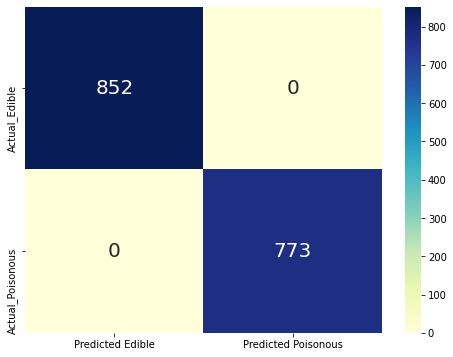

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(random_state=0)
start = time.time()
RFclassifier.fit(x_newtrain, y_newtrain)
stop = time.time()
trainingTime = stop - start
print(f"Training time: {trainingTime}s")

y_pred = RFclassifier.predict(x_newtest)
cm = confusion_matrix(y_newtest, y_pred)
ac = accuracy_score(y_newtest, y_pred)
precision = precision_score(y_newtest, y_pred)
recall = recall_score(y_newtest, y_pred)
f1 = f1_score(y_newtest, y_pred)

acscore.append(ac)
acprecision.append(precision)
acrecall.append(recall)
acF1.append(f1)
acTrainingTime.append(trainingTime)

sns.heatmap(cm, xticklabels=['Predicted Edible', 'Predicted Poisonous'], yticklabels=['Actual_Edible', 'Actual_Poisonous'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print(cm)
print('Accuracy score: {0:0.3f}'.format(ac))
print('Precision score: {0:0.3f}'.format(precision))
print('Recall score: {0:0.3f}'.format(recall))
print('F1 score: {0:0.3f}'.format(f1))
print('Training Accuracy: ',RFclassifier.score(x_newtrain, y_newtrain))
print('Testing Accuracy: ',RFclassifier.score(x_newtest, y_newtest))

By applying the Random Forest classifier algorithm. The result of the accuracy of the Random Forest classifier is 1. The precision score is also 1 which is the perfect score. The number of both false positives and false negative values by using Random Forest Classifier is 0. The recall score for the method is 1, so that we will not classify wrongly for example if a mushroom is actually epoisonous, the classification result will not be classified as edible but classified as poisonous. Thus, the F1 score is also 1. In conclusion, the Random Forest classifier brings us the perfect prediction value that means by using this algorithm, we can predict the class of the mushrooms accurately and avoid the misprediction of the class. This algorithm is not overfitted because the testing accuracy is 1.

## Stochastic Gradient Descent

Training time: 0.04306340217590332s
[[819  33]
 [ 62 711]]
Accuracy score: 0.942
Precision score: 0.956
Recall score: 0.920
F1 score: 0.937
Training Accuracy:  0.9370672411140175
Testing Accuracy:  0.9415384615384615


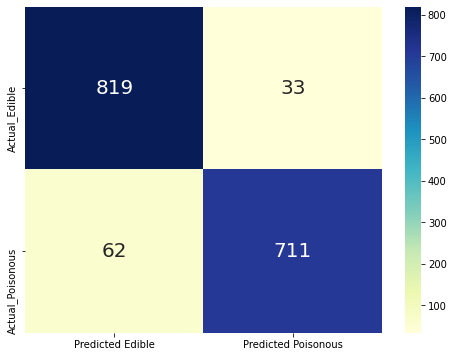

In [ ]:
from sklearn.linear_model import SGDClassifier

SGDClass = SGDClassifier(shuffle=False,random_state=0)
start = time.time()
SGDClass.fit(x_newtrain, y_newtrain)
stop = time.time()
trainingTime = stop - start
print(f"Training time: {trainingTime}s")

# Predicting the test set
y_pred = SGDClass.predict(x_newtest)

# Making the confusion matrix and calculating accuracy score
cm = confusion_matrix(y_newtest, y_pred)
ac = accuracy_score(y_newtest, y_pred)
precision = precision_score(y_newtest, y_pred)
recall = recall_score(y_newtest, y_pred)
f1 = f1_score(y_newtest, y_pred)

acscore.append(ac)
acprecision.append(precision)
acrecall.append(recall)
acF1.append(f1)
acTrainingTime.append(trainingTime)

sns.heatmap(cm, xticklabels=['Predicted Edible', 'Predicted Poisonous'], yticklabels=['Actual_Edible', 'Actual_Poisonous'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
print(cm)
print('Accuracy score: {0:0.3f}'.format(ac))
print('Precision score: {0:0.3f}'.format(precision))
print('Recall score: {0:0.3f}'.format(recall))
print('F1 score: {0:0.3f}'.format(f1))
print('Training Accuracy: ',SGDClass.score(x_newtrain, y_newtrain))
print('Testing Accuracy: ',SGDClass.score(x_newtest, y_newtest))

By applying the Stochastic Gradient Descent algorithm. The result of the accuracy of the Stochastic Gradient Descent is 0.94. The precision score is also 0.96 which is a high value score. The number  for false positives in this algorithm is 33 and false negative values is 62. The recall score for the method is 0.96. Although it is a relatively high value, the number of classified poisonous mushroom as edible is still consider high. The F1 score for this algorithm is 0.94. In conclusion, the Stochastic Gradient Descent brings us the good prediction value that means by using this algorithm. However, there is still counted high number for false negative and false positive.

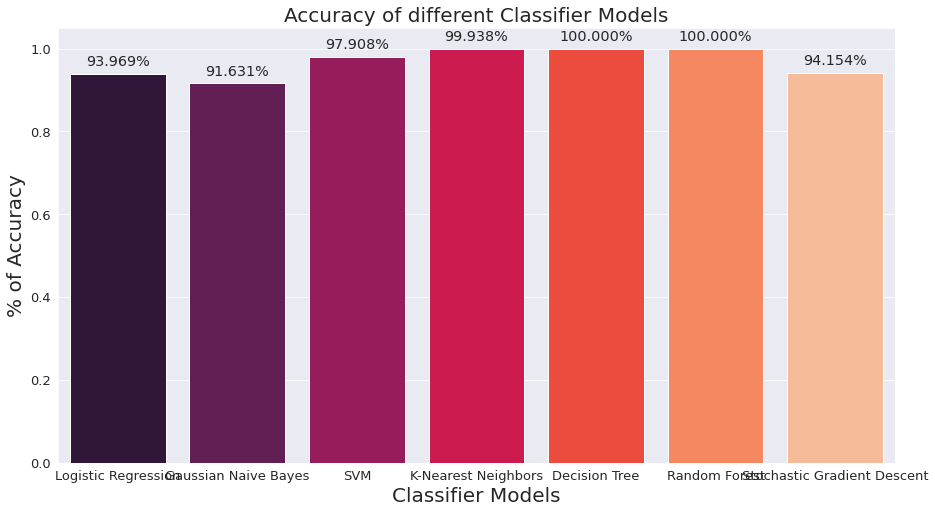

In [ ]:
# every model accuracy graph
models = ['Logistic Regression','Gaussian Naive Bayes','SVM','K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Stochastic Gradient Descent']
# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=acscore, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.3%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

The accuracy score is the total score for the confusion matrix which is total predicted score over total actual score. Somehow, the accuracy score is not representing that the model is the best, but it is also important. Based on the barchart above, we can see that the models which provide the perfect accuracy is the Decision Tree and Random Forest which is 100% accurate. But this does not means that these three are the best models, the other models could also provide high accuracy score that all scored above 90%. These followed by the K-Nearest Neighbours which has a close to perfect score,KNN, SVM, Stochastic Gradient Descent model, Logistic Regression, and Gaussian Naive Bayes which gives the lowest score.


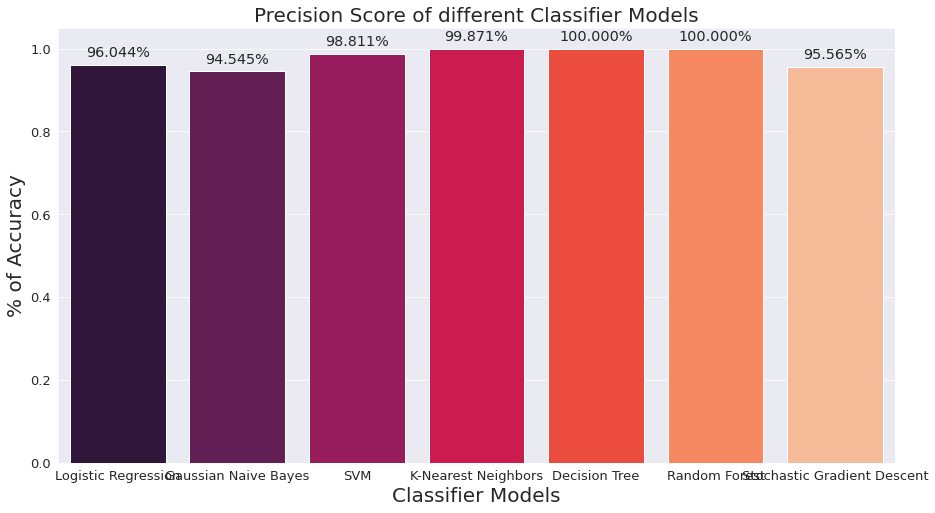

In [ ]:
# every model precision score graph
models = ['Logistic Regression','Gaussian Naive Bayes','SVM','K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Stochastic Gradient Descent']
# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=acprecision, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Precision Score of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.3%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

The precision score talks about how precise or accurate that the model is out of those predicted positive, and how many of them are actual positive. This means that if a mushroom is not poisonous but it has been identified as poisonous. For our case, the graph shows that Decision tree, and Random forest again give the best score over the others. But the other models could also provide the result of over 90% of precision score, these followed by the KNN, SVM, Logistic Regression, Stochastic gradient descent, and Gaussian Naive Bayes model which has the lowest score.

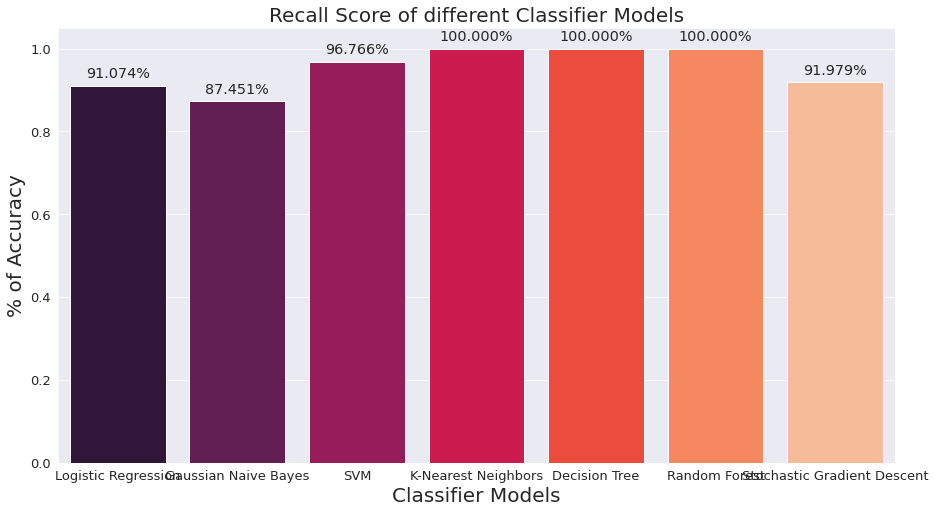

In [ ]:
# every model recall score graph
models = ['Logistic Regression','Gaussian Naive Bayes','SVM','K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Stochastic Gradient Descent']
# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=acrecall, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Recall Score of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.3%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

The recall score is actually caculates how many of the actual positives is being labeled as true positive. This could prevent a poisonous mushroom being predicted as non-poisonous mushroom. From the chart above, Decision tree, and Random forest again outscored the other models by having 100% of recall score. The KNN also could obtain the recall score by 100%. While they followed by the SVM, Stochastic gradient descent, Logistic regression, and Gaussian Naive Bayes. GNB model again gives the lowest result of the recall score.

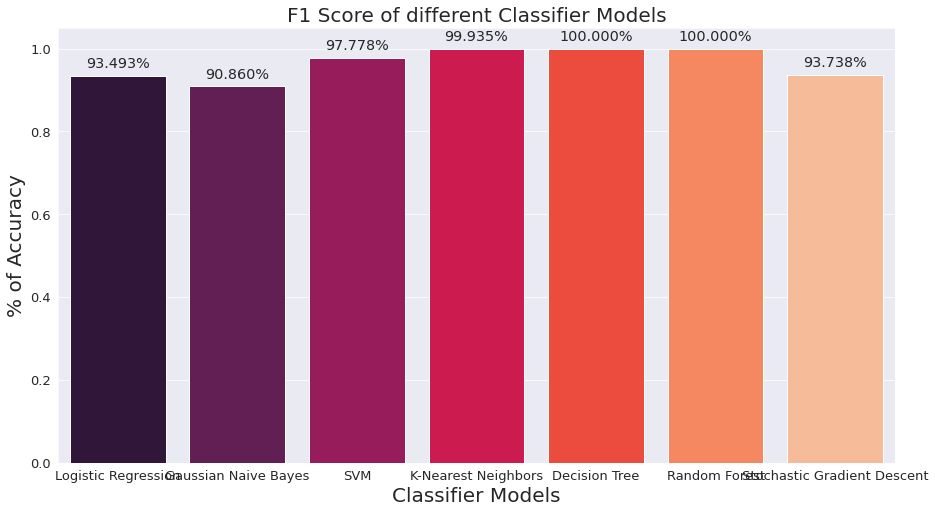

In [ ]:
# every model F1 Score graph
models = ['Logistic Regression','Gaussian Naive Bayes','SVM','K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Stochastic Gradient Descent']
# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=acF1, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("F1 Score of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.3%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

F1 score is a weighted average of precision score and recall score. It takes both false positive and false negative into account. F1 score is way much useful compared to the accuracy. For our case, some of our trained algorithm model having significance difference of false positive and false negative. Therefore, we are more recommended to use the f1 score to observe which model is better. As the figure shown above, we are able to know that the best f1 score model is KNN, decision tree and random forest meanwhile for the lowest f1 score is Gaussian naïve bayes. The sequence of the f1 score will be Decision tree, random forest, KNN, SVM, Stochastic Gradient Descent , Logistic Regression and Gaussian naïve bayes.  

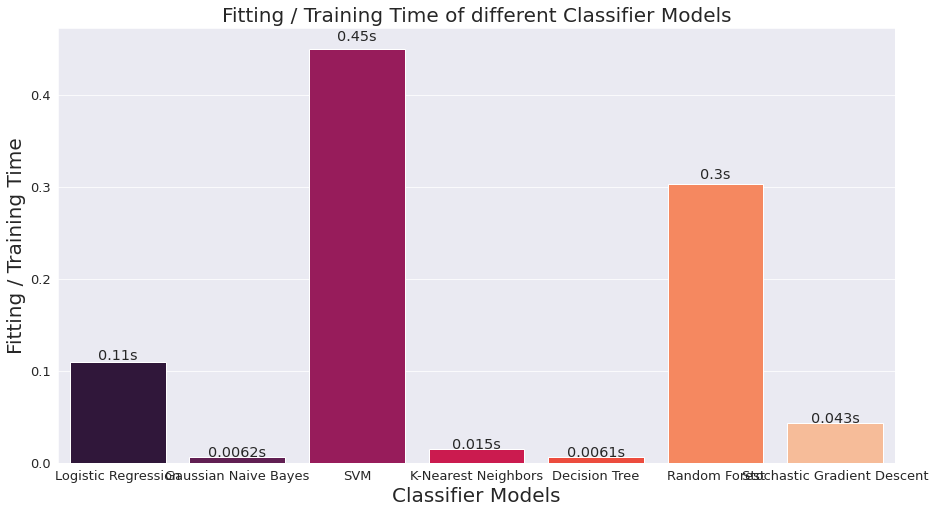

In [ ]:
# every model training time graph
models = ['Logistic Regression','Gaussian Naive Bayes','SVM','K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Stochastic Gradient Descent']
# Visualising the accuracy score of each classification model
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=acTrainingTime, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("Fitting / Training Time", fontsize = 20)
plt.title("Fitting / Training Time of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2}''s', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Training time is the period of time that model used to train itself before going for testing. The longer the time taken for training, the higher the computational cost. It's mean that the shorter time taken is the better model. There is no significance difference on the training time for Gaussian naive bayes and decision tree. As the figure shown above, we are able to know that the longest time take model is SVM algorithm model meanwhile for the shortest time take model is Gaussian naïve bayes algorithm model. The training time taken for SVM model is almost triple of the training time of random forest model, therefore the computational cost for svm is considered high and most likely not recommended for business use which required instant response. The sequence of the time taken to train the model will be Gaussian naïve bayes, decision tree, KNN, Stochastic gradient descent, Logistic regression, random forest and SVM.

# **E) Evaluation**

# Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'SVC' :{
        'model':SVC(),
        'params' : {
        'gamma':[3,5,15],
        'C' : [1,10,20],
        'kernel' : ['rbf','linear']
        }
    },
    'KNN' :{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,9,81]
        }
        
    },
    'LogisticRegression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
    },
    'DecisionTree':{
        'model':DecisionTreeClassifier(random_state = 0),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[5,15,20]
        }
    },
    'RandomForest':{
        'model':RandomForestClassifier(random_state = 0),
        'params':{
            'criterion':['gini','entropy'],
            'n_estimators':[1,5,10]
        }
    },
    'SGD':{
        'model':SGDClassifier(shuffle=False, random_state = 0),
        'params':{
            'loss':['log','modified_huber','hinge'],
            'penalty':['elasticnet','l1','l2']
        }
    }
}
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5,return_train_score=False)
    clf.fit(x_new,y)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_,
        'refit_time':clf.refit_time_
         
    })
        
GridSearchdf = pd.DataFrame(scores, columns=['model','best_score','best_params','refit_time'])
GridSearchdf



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,model,best_score,best_params,refit_time
0,SVC,0.923936,"{'C': 1, 'gamma': 3, 'kernel': 'rbf'}",0.499570
1,KNN,0.893127,{'n_neighbors': 3},0.016144
2,LogisticRegression,0.898932,{'C': 1},0.115870
3,DecisionTree,0.914305,"{'criterion': 'gini', 'max_depth': 15}",0.006700
4,RandomForest,0.944471,"{'criterion': 'entropy', 'n_estimators': 5}",0.018112
5,SGD,0.727837,"{'loss': 'hinge', 'penalty': 'l2'}",0.037023


Grid search is mainly used for parameter tuning, which means grid search will help us to find the best parameter for each model. Different parameters of each model will give us different results. We have passed a set of parameters for different models into the grid search function. Grid search will return us the optimal parameter from the set parameters we specify for each model.  Table above shows the grid search results of each model. From the “best_params”, we can observe the best parameter combination that returns from the grid search function. For example, the best parameters for SVC  classifier are C=1, gamma = 3 and kernel is rbf. We will perform cross validation for each model with optimal parameters that return from grid search function. Grid search returns the refit time and the best mean score as well for each model. From the above, we can observe that Random Forest has the highest best score and followed by SVC, Decision Tree, KNN , Logistic Regression and the lowest which is SGD with only 0.727837 of best score.


#Grid Search Refit Time

In [ ]:
refit_time = []
for i in range (6):
    refit_time.append(GridSearchdf["refit_time"].iloc[i]) 

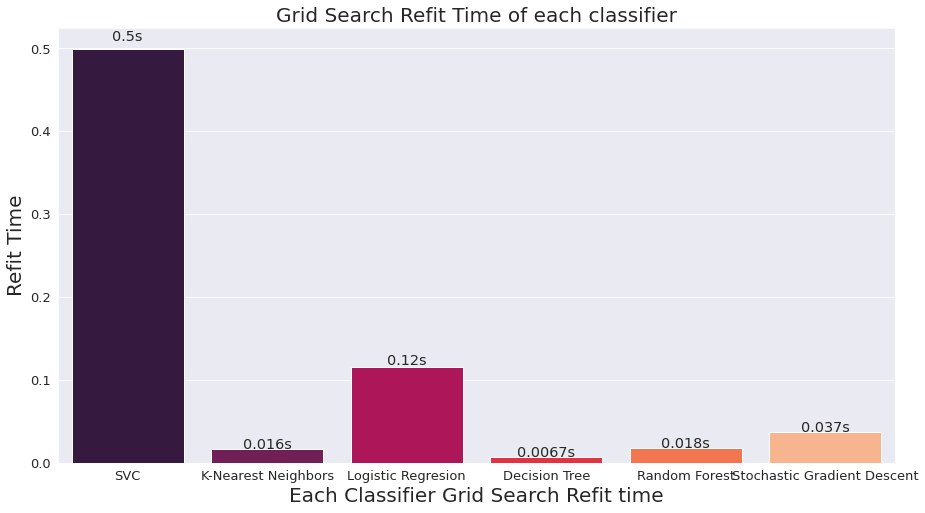

In [ ]:
# Visualising the refit time of grid search in each Classifier
models = ['SVC','K-Nearest Neighbors','Logistic Regresion', 'Decision Tree', 'Random Forest', 'Stochastic Gradient Descent']
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x = models, y=refit_time, palette = "rocket", saturation =1.5)
plt.xlabel("Each Classifier Grid Search Refit time", fontsize = 20 )
plt.ylabel("Refit Time", fontsize = 20)
plt.title("Grid Search Refit Time of each classifier", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2}''s', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Refit time is time taken for the model using grid search method to fit in different parameters. For example, it will try the best parameter for every model that user wanted to test. The longer the time taken for training, the higher the computational cost. It means that the shorter time taken is the better model. There is no significant difference in the refit time for KNN, decision tree and random forest. As the figure shown above, we are able to know that the longest time take model is the SVC algorithm model meanwhile for the shortest time take model is the Decision tree algorithm model. On the other hand, there is significant difference on the refit time taken for the SVM model and logistic regression model, which is almost four times of the refit time of logistic regression model, therefore the computational cost for svm is considered high and most likely not recommended for business use which requires instant response. The sequence of the time taken to train the model will be Decision tree, KNN, Random forest, Stochastic Gradient Descent, Logistic regression and SVM. 

#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
CVMean = []

LGTuple = []
LGTuple = cross_val_score(LogisticRegression(C=1),x_new,y,cv=5,scoring='accuracy')
print(LGTuple)
print("LG CV mean : ",LGTuple.mean())
CVMean.append(LGTuple.mean())

GNBTuple = []
GNBTuple = cross_val_score(GaussianNB(),x_new,y,cv=5,scoring='accuracy')
print(GNBTuple)
print("GNB CV mean : ",GNBTuple.mean())
CVMean.append(GNBTuple.mean())

SVCTuple = []
SVCTuple = cross_val_score(SVC (gamma=3,kernel='rbf',C=1),x_new,y,cv=5,scoring='accuracy')
print(SVCTuple)
print("SVC CV mean : ",SVCTuple.mean())
CVMean.append(SVCTuple.mean())


KNNTuple = []
KNNTuple = cross_val_score(KNeighborsClassifier(n_neighbors = 3),x_new,y,cv=5,scoring='accuracy')
print(KNNTuple)
print("KNN CV mean : ",KNNTuple.mean())
CVMean.append(KNNTuple.mean())


DTTuple = []
DTTuple = cross_val_score(DecisionTreeClassifier(criterion = 'gini', max_depth = 15,random_state=0),x_new,y,cv=5,scoring='accuracy')
print(DTTuple)
print("DT CV mean : ",DTTuple.mean())
CVMean.append(DTTuple.mean())

RFTuple = []
RFTuple = cross_val_score(RandomForestClassifier(criterion = 'entropy', n_estimators = 5,random_state=0),x_new,y,cv=5,scoring='accuracy')
print(RFTuple)
print("RF CV mean : ",RFTuple.mean())
CVMean.append(RFTuple.mean())

SGDTuple = []
SGDTuple = cross_val_score(SGDClassifier(shuffle=False,loss = 'hinge', penalty = 'l2',random_state=0),x_new,y,cv=5,scoring='accuracy')
print(SGDTuple)
print("SGD CV mean : ",SGDTuple.mean())
CVMean.append(SGDTuple.mean())


[0.87938462 0.91569231 0.87569231 0.99753846 0.82635468]
LG CV mean :  0.8989324744221296
[0.88923077 0.97353846 0.80553846 0.99815385 0.55849754]
GNB CV mean :  0.8449918150814704
[0.77230769 1.         0.86707692 1.         0.98029557]
SVC CV mean :  0.9239360363774157
[0.85353846 1.         0.95753846 1.         0.65455665]
KNN CV mean :  0.8931267146646457
[0.84246154 1.         1.         1.         0.72906404]
DT CV mean :  0.914305115574081
[0.89415385 1.         0.99753846 1.         0.83066502]
RF CV mean :  0.9444714664645699
[0.67938462 0.52492308 0.75938462 1.         0.67549261]
SGD CV mean :  0.7278369837059492


# Accuracy of different cross validation in Logistic Regression classifier.

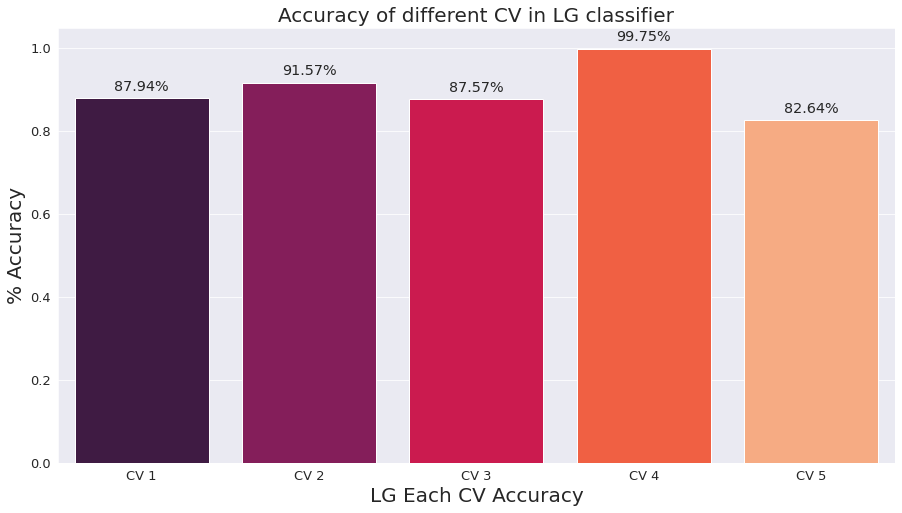

In [ ]:
# Visualising the accuracy score of each CV in LG classifier
models = ['CV 1','CV 2','CV 3','CV 4', 'CV 5']

plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=LGTuple, palette = "rocket", saturation =1.5)
plt.xlabel("LG Each CV Accuracy", fontsize = 20 )
plt.ylabel("% Accuracy", fontsize = 20)
plt.title("Accuracy of different CV in LG classifier", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

For cross validation, we had split the dataset into 5 parts/sections for train test. Cv1 means the model using the first section of the dataset for testing and the rest sections for training. For cv2, the model will use the second section for testing and the rest section for training. After cv2, the model will do the same procedure as previous step by step for cv3, cv4 and cv5. As the figure shown above, we are able to observe that for logistic regression algorithm model, the highest accuracy is using cv4 meanwhile for the lowest accuracy is using cv5. By understanding the bar chart shown above, CV4 has a respectively high accuracy which is 99.75% and almost 100%. All of the CV in logistic regression is having accuracy which is near to each other and they are all above 80%. Hence, we can observe that there is no significant difference between the cv. We are able to tell that this classifier is stable and consistent. Therefore, we conclude that Logistic regression is not robust to training and testing dataset.

# Accuracy of different cross validation in Gaussian Naive Bayes classifier.

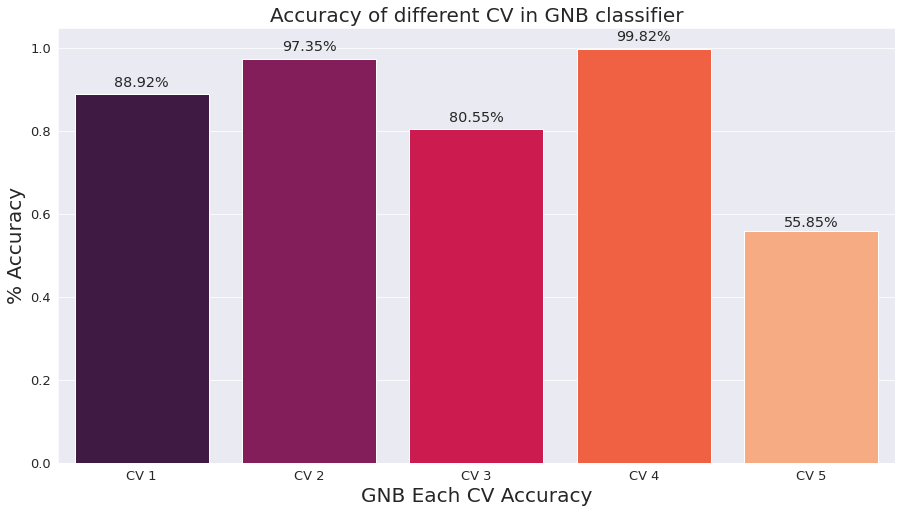

In [ ]:
# Visualising the accuracy score of each CV in GNB classifier
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=GNBTuple, palette = "rocket", saturation =1.5)
plt.xlabel("GNB Each CV Accuracy", fontsize = 20 )
plt.ylabel("% Accuracy", fontsize = 20)
plt.title("Accuracy of different CV in GNB classifier", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

By using cross validation, we have 5 cv for our prediction which means we fold our dataset into 5 portion, while all of the protion are taken to be test for the accuracy score which consist of cv1, cv2, cv3, cv4, and cv5. From the chart above, it shows that by using the Baussian Naive Bayes model, the accuracy of each cv is not quite consistent as cv2 and cv4 obtain the accuracy score of 97.35% and 99.82% respectively, while the accuracy for cv1 and cv3 is above 80% which is 88.92% and 80.55% respectively, but the result of cv5 is only 55.85%. This means that this model does not give a stable and consistent result for every of the prediction. This means that the Gaussian Naive Bayes Model is robust to the training and testing dataset.

# Accuracy of different cross validation in SVC classifier.

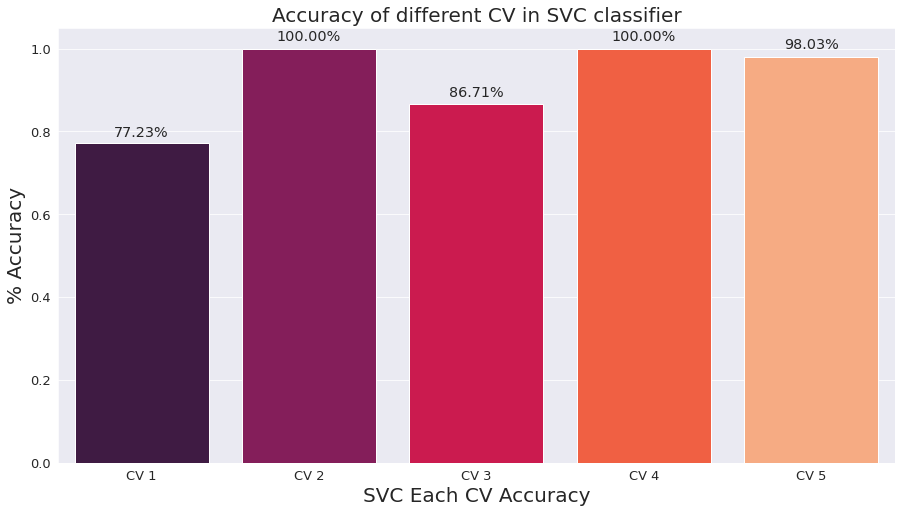

In [ ]:
# Visualising the accuracy score of each CV in SVC classifier
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=SVCTuple, palette = "rocket", saturation =1.5)
plt.xlabel("SVC Each CV Accuracy", fontsize = 20 )
plt.ylabel("% Accuracy", fontsize = 20)
plt.title("Accuracy of different CV in SVC classifier", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

As mentioned above, the dataset will be split into 5 parts/sections for train test. From the bar chart shown above, we are able to know that for the SVC algorithm model the highest accuracy is using cv2 and cv4 meanwhile for the lowest accuracy is using cv1. The sequence of the cross validation accuracy for the SVC algorithm model is cv2, cv4, cv5, cv3 and cv1. By understanding the bar chart, even though the accuracy of CV2, CV4 and CV5 of SVC classifier have a respectively high accuracy which are 100% accuracy for both CV2 and CV4 and 98.03% for CV5. The fourth highest CV is CV3 which is still acceptable which is 86.71%, but we can observe that there are significant differences between the fourth highest and the last CV which are almost 10% difference between CV 3 and CV 1. Even though the accuracy is quite high for some of the CV in SVC classifier, but this classifier is not stable and not consistent because accuracy of CV1 which is only 77.23% and  obtains less than 80% of accuracy score. Hence, we conclude that SVC is robust to the training and testing dataset. 

# Accuracy of different cross validation in K-Nearest Neighbour classifier.

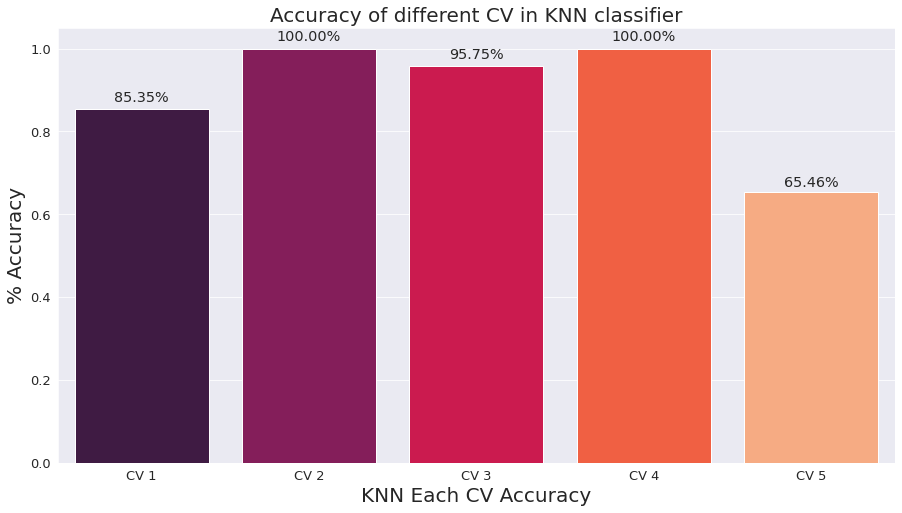

In [ ]:
models = ['CV 1','CV 2','CV 3','CV 4', 'CV 5']
# Visualising the accuracy score of each CV in KNN classifier
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=KNNTuple, palette = "rocket", saturation =1.5)
plt.xlabel("KNN Each CV Accuracy", fontsize = 20 )
plt.ylabel("% Accuracy", fontsize = 20)
plt.title("Accuracy of different CV in KNN classifier", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot,yPlot = p.get_xy() 
    ax.annotate(f'{height:.2%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

By using cross validation, we have 5 cv for our prediction which means we fold our dataset into 5 portion, while all of the protion are taken to be test for the accuracy score which consist of cv1, cv2, cv3, cv4, and cv5. From the chart above, it shows that by using the K-Nearest Neighbour model, the accuracy of each cv is not quite consistent as cv2 and cv4 obtain the accuracy score of 100% which is perfect score, while the accuracy for cv1 is 85.35% and cv3 is 95.75% which is relatively high but the result of cv5 is only 65.46%. This means that this model does not give a stable and consistent result for every of the prediction. This means that the K-Nearest Neighbour Model is robust to the training and testing dataset.

## Accuracy of different cross validation in Decision Tree classifier.

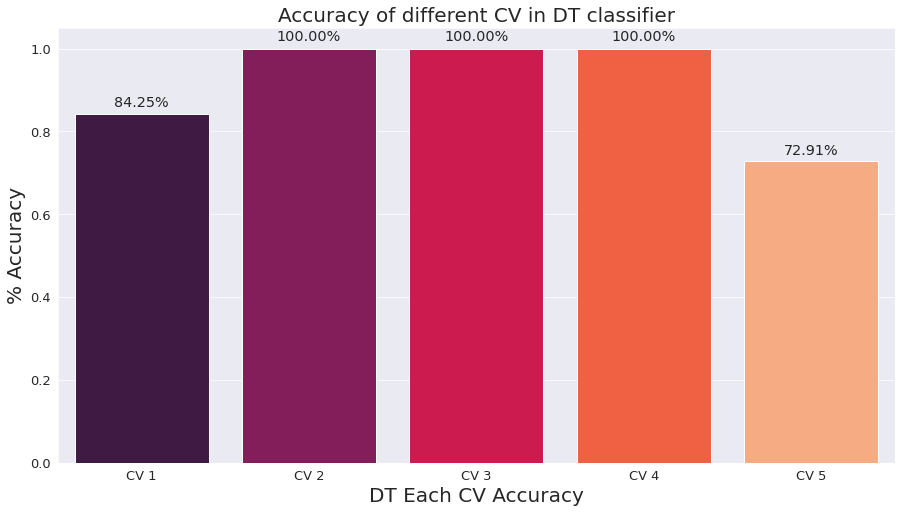

In [ ]:
# Visualising the accuracy score of each CV in DT classifier
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=DTTuple, palette = "rocket", saturation =1.5)
plt.xlabel("DT Each CV Accuracy", fontsize = 20 )
plt.ylabel("% Accuracy", fontsize = 20)
plt.title("Accuracy of different CV in DT classifier", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

The bar chart above shows that the 5 cross validation for the accuracy of different cv in Decision Tree classifier. We can see that for CV 2, CV 3 and CV 4 has the 100% accuracy. However it has a significantly drop at CV 1 and CV 5 with only 84.25 and 72.91 accuracy respectively. Therefore we can conclude that the Decision Tree Algorithm does not provide a stable and consistance result for every prediction. The bar chart also mean the Decision Tree classifier is robust to the training and testing in dataset. 

## Accuracy of different cross validation in Random Forest classifier

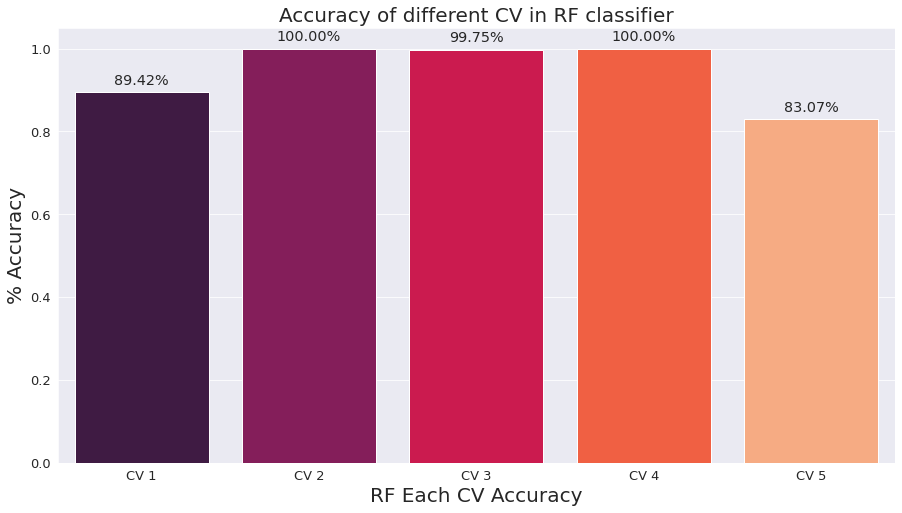

In [ ]:
# Visualising the accuracy score of each CV in RF classifier
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=RFTuple, palette = "rocket", saturation =1.5)
plt.xlabel("RF Each CV Accuracy", fontsize = 20 )
plt.ylabel("% Accuracy", fontsize = 20)
plt.title("Accuracy of different CV in RF classifier", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

For cross validation, we had split the dataset into 5 parts/sections for train test. The bar chart above show the accuracy for each cross validation. For CV 2 and CV 4, it provide a 100% accuracy for the prediction. CV 3 is also give a extreme high value of 99.75% on prediction. However there is only 89.42% and 83.07% of accuracy for CV 1 and CV 5 respectively. Thus, it mean that there is no stable and consistancy in this algorithm. This also mean that the Random Forest Algorothm is robust to training and testing in dataset.

## Accuracy of different cross validation in SGD classifier

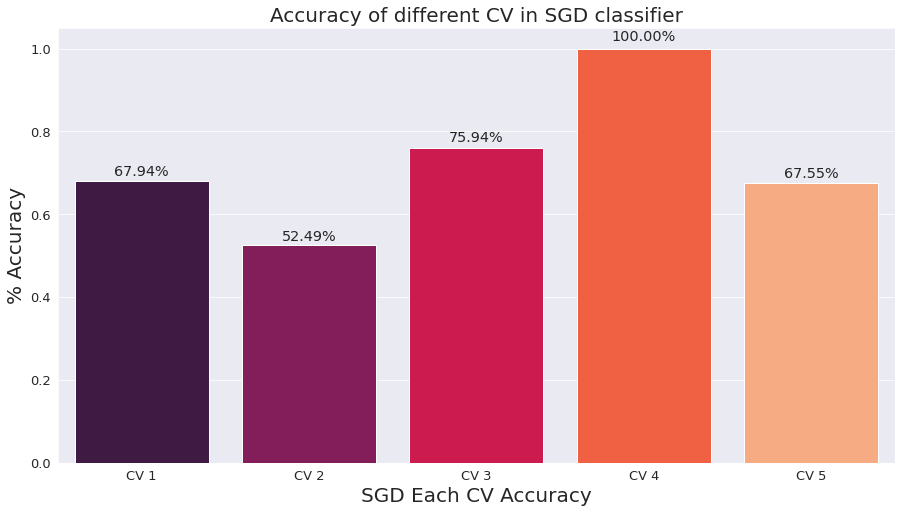

In [ ]:
# Visualising the accuracy score of each SGD in DT classifier
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=SGDTuple, palette = "rocket", saturation =1.5)
plt.xlabel("SGD Each CV Accuracy", fontsize = 20 )
plt.ylabel("% Accuracy", fontsize = 20)
plt.title("Accuracy of different CV in SGD classifier", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

The bar chart above shows the 5 cross validation in our prediction. For accuracy score in Stochastic Gradient Descent classifier, the CV 4 has provide 100% accuracy for the prediction. It is a perfect score. However, the is a significant difference for other cross validations. The CV 2 has the lowest accuracy value which is only 52.49%. It is a bad score for the prediction. While for CV 1 and CV 5 own the accuracy score of 67.94% and 67.55% respectively. The second highest accuracy score is CV 3 which has 75.94% of accuracy. For the bar chart above, we can conclude that there is no stable and consistancy prediction result for the SGD algorithm. Thus, the SGD is  is robust to the training and testing dataset. 

# Cross Validation Mean Accuracy of Each Classifier

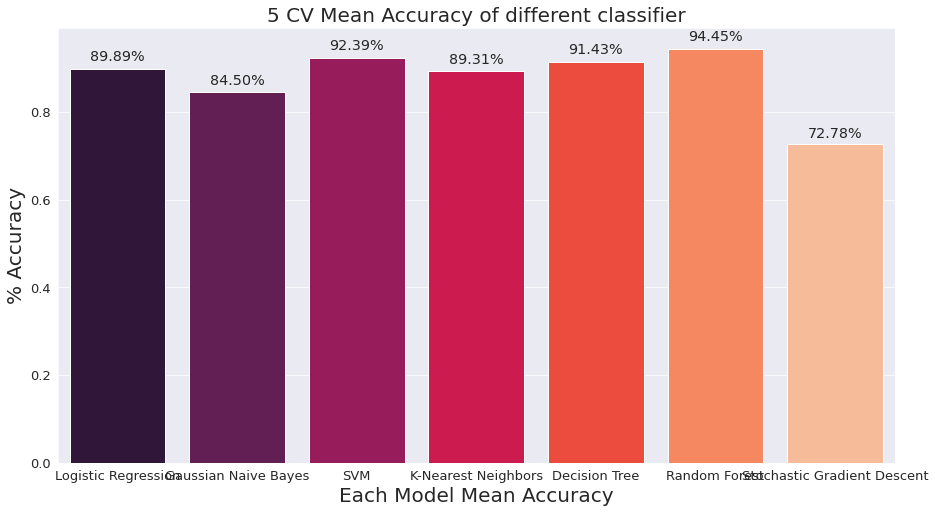

In [ ]:
# Visualising the mean accuracy score of 5 CV in each Classifier
models = ['Logistic Regression','Gaussian Naive Bayes','SVM','K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Stochastic Gradient Descent']
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=CVMean, palette = "rocket", saturation =1.5)
plt.xlabel("Each Model Mean Accuracy", fontsize = 20 )
plt.ylabel("% Accuracy", fontsize = 20)
plt.title("5 CV Mean Accuracy of different classifier", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

The bar chart above shows the mean score of each model cross validation results. We have specified the CV = 5 which means the dataset is divided into 5 portions, each CV will use different portions of the dataset for training and testing. CV means score is the average score of all the 5 cross validation of each model that we have used. From the bar chart, we can observe that Random Forest has the highest mean score among others with 94.45% of mean score. It also means that the Random Forest classifier is the most stable and consistent compared to the other classifiers or models. These results show that Random Forest is not robust to the training set and testing set. SVM and Decision Tree obtain a great mean score as well with the score more than 90%. K-Nearest Neighbours, Logistic Regression and Gaussian Naive Bayes obtain mean scores more than 80% which is also a good result. There is no significant difference between K-Nearest Neighbors and Logistic Regression. While for Stochastic Gradient Descent has the worst cross validation mean among other classifiers. The sequence from the highest to the lowest for the classifiers we used are Random Forest, SVM, Decision Tree, Logistic Regression, K-Nearest Neighbours, Gaussian Naive Bayes and lastly Stochastic Gradient Descent.

# F) Deployment

We have evaluated the different models based on different methods such as training time, accuracy score, precision score, F1-score and Cross Validation. We have decided to implement the Random Forest classifier for the future or next mushrooms dataset for predictive analysis. The results that we obtained from Random Forest are better than other algorithms classifiers based on the evaluation in different areas. Random Forest classifier has reached most of the business requirements and goals. The training time and grid search refit time for Random Forest is one of the lowest compared to each other which means one of lowest computational cost also. The accuracy score, recall and precision  score based on normal modelling are very high which is 100%. None of the poisonous mushrooms is predicted as edible mushrooms. Which will not cause any harm or human death. We have tested the consistency and stability of by using the Cross Validation method. The result obtained from the cross validation method for Random Forest is quite good, consistent and stable  because each cross validation in Random Forest also obtains a high accuracy score. Furthermore, Random Forest has the highest CV mean score among other classifiers. 

#G) Conclusion

In conclusion, we have tried different types of classifiers to determine which classifier is the most suitable and meet the business requirements and goals. We have decided to implement the Random Forest classifier for the future or next mushrooms dataset for predictive analysis. Even though SVC classifier obtain a high accuracy score and high mean score for cross validation, but the training and refit time of SVC classifier are almost 2-3 times of  everytime classifier that we have tested. It means the computational cost is highest compared to others algorithm classifiers. Stochastic Gradient Descent has the lowest cross validation mean accuracy score and there is a significant difference with other models.  Stochastic Gradient Descent is the only classifier that obtains less than 80% of cross validation mean accuracy score even though the training and refit time is low. Each cross validation results of Stochastic Gradient Descent is not stable, not consistent and very robust to the training data and testing data. Even though K-nearest Neighbour and Decision Tree obtains high score in accuracy, precision and recall score and have lesser training time compared to Random Forest, but Random Forest is more stable, consistent and has better mean cross validation score. There is not significant difference is refit time between Random Forest, K-nearest Neighbour and Decision Tree. Gaussian Naive Bayes classifier has the second lowest mean cross validation score, not stable and not consistent enough.

#H)Reference

Exsilio Blog, 2016, Accuracy, Precision, Recall & F1 Score: Interpretation of Performance Measures - Exsilio Blog, viewed on 13 July 2020, <https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/.>

Ping Shung, K 2018,  Accuracy, Precision, Recall or F1? [online] Towards Data Science, viewed on 13 July 2020, <https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.>

Scikit-learn 2019, sklearn.svm.SVC — scikit-learn 0.22.2 documentation, viewed on 14 July 2020, <http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html>

Scikit-learn 2019, sklearn.naive_bayes.GaussianNB — scikit-learn 0.22.1 documentation, viewed on 16 July 2020,  <https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html>

Scikit-learn 2020, 3.2.4.3.1. sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation, viewed on 17 July 2020, <https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>

Scikit-learn 2019, 1.5. Stochastic Gradient Descent — scikit-learn 0.23.2 documentation, viewed on 20 July 2020, <https://scikit-learn.org/stable/modules/sgd.html>

Scikit-learn 2014, sklearn.linear_model.LogisticRegression — scikit-learn 0.21.2 documentation, viewed on 20 July 2020, <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html>

Scikit-learn  2009, 1.10. Decision Trees — scikit-learn 0.22 documentation, viewed on 21 July 2020, <https://scikit-learn.org/stable/modules/tree.html>

Scikit-learn 2019, sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.22.1 documentation, viewed on 17 July 2020, <https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html>

Scikit-learn 2019, sklearn.metrics.f1_score — scikit-learn 0.21.2 documentation, viewed on 22 July 2020, <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html>

Scikit-learn  2019, sklearn.metrics.recall_score — scikit-learn 0.23.2 documentation, viewed on 15 July 2020, <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html>

Scikit-learn  2019, sklearn.metrics.precision_score — scikit-learn 0.23.2 documentation, viewed on 16 July 2020, <https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html>

Scikit-learn 2019, sklearn.model_selection.GridSearchCV — scikit-learn 0.22 documentation, viewed on 14 July 2020, <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html>

Scikit-learn 2009, 3.1. Cross-validation: evaluating estimator performance — scikit-learn 0.21.3 documentation, viewed on 14 July 2020, <https://scikit-learn.org/stable/modules/cross_validation.html.>